In [1]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('llama2_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4         5         6  \
0  1.188418 -1.736702 -0.191322 -1.994687  0.057326  2.883176 -0.838245   
1  1.457455  0.817127  1.458703 -1.812698  0.367964  1.609878 -1.075397   
2  0.149753 -1.643355  0.711284 -2.487119 -2.410948 -0.555468 -0.380990   
3  1.069569 -0.899952  1.030322 -1.479048 -0.635635  0.216762  0.876879   
4  0.505189 -1.607398  2.388520 -2.933331 -0.703085  1.615509  0.834435   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.477511  2.910899  3.599902  ... -1.576188 -2.516441  0.888087  0.380534   
1 -1.194629 -0.962105  1.071324  ... -0.815370  0.260745 -0.913560  1.406413   
2 -2.519633  1.750998  1.200407  ... -1.961351  1.976893 -0.154175  1.196034   
3 -0.637044  1.633442  3.777382  ... -1.118121  2.991307  0.879041 -0.939751   
4 -0.337594 -0.439151  1.605850  ... -1.599698 -0.193177  0.144442  0.711942   

       4091      4092      4093      4094      4095      cat_one_hot

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [3]:
def knn_classification(dataset,n_neighbors,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Entrenar el modelo de regresión logística
        modelo_knn.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_knn.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_llama2_embeddings_val_simple_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/KNN_llama2_embeddings_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_knn, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_llama2_embeddings_val_cruz_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/KNN_llama2_embeddings_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_simple_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.1.png


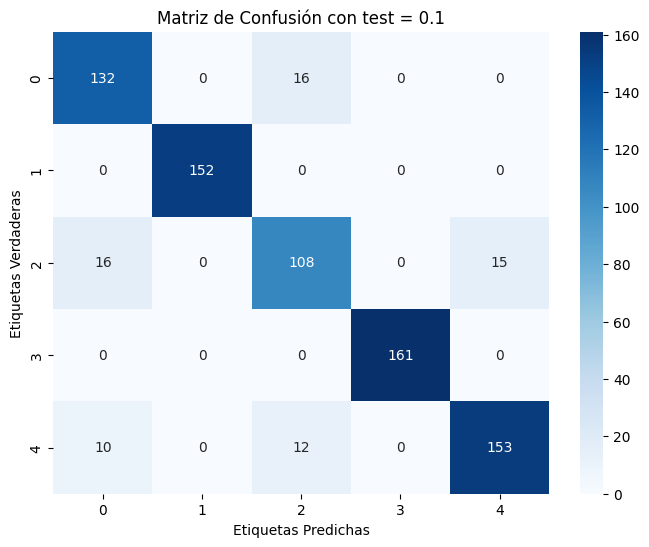

Exactitud del modelo: 0.9109677419354839
Precisión del modelo: 0.911487642014748
Recall del modelo: 0.9109677419354839
Puntuación F1 del modelo: 0.9109508455581646
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.2.png


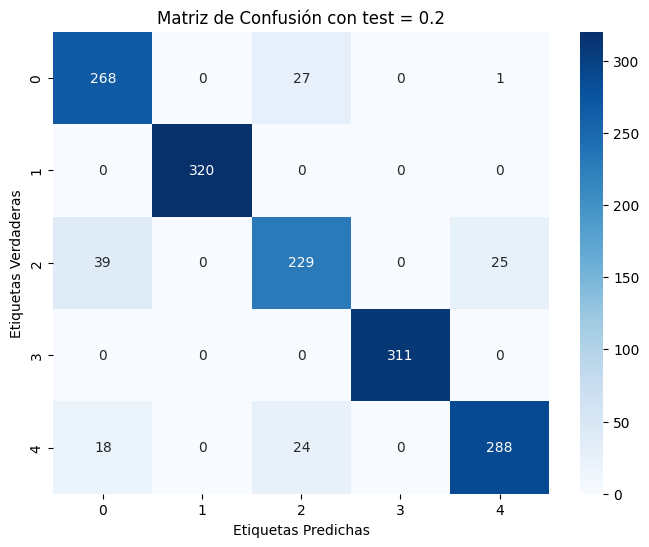

Exactitud del modelo: 0.9135483870967742
Precisión del modelo: 0.9144473909283649
Recall del modelo: 0.9135483870967742
Puntuación F1 del modelo: 0.91344222198367
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.3.png


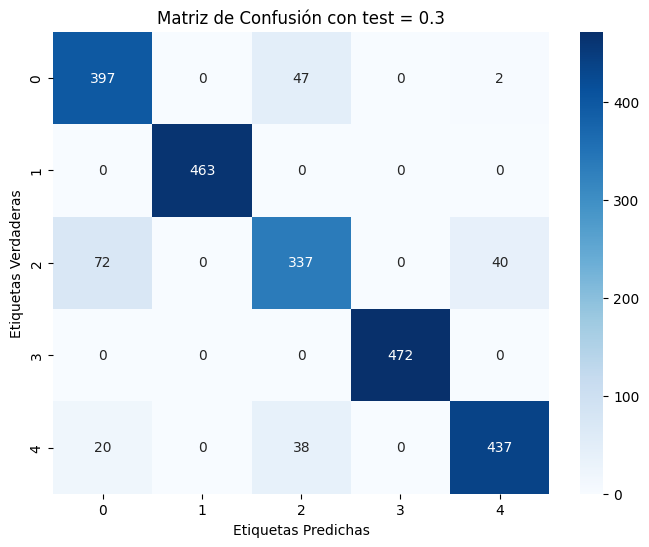

Exactitud del modelo: 0.9058064516129032
Precisión del modelo: 0.9063435131908683
Recall del modelo: 0.9058064516129032
Puntuación F1 del modelo: 0.9055344102544385
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.4.png


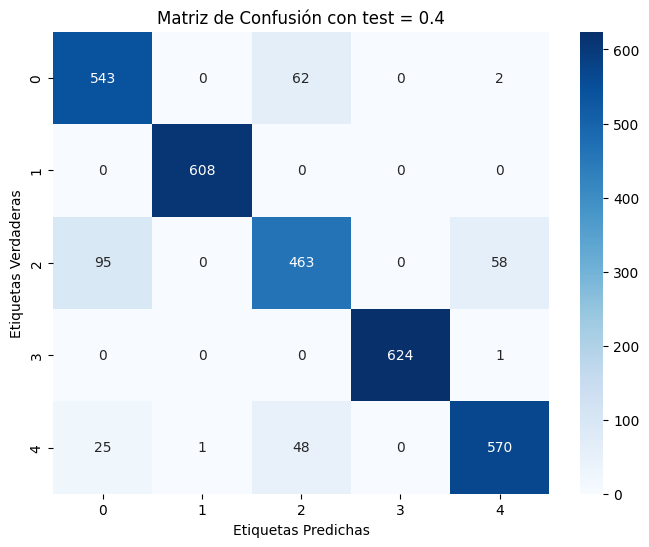

Exactitud del modelo: 0.9058064516129032
Precisión del modelo: 0.9060083399999391
Recall del modelo: 0.9058064516129032
Puntuación F1 del modelo: 0.9053589648728473
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.5.png


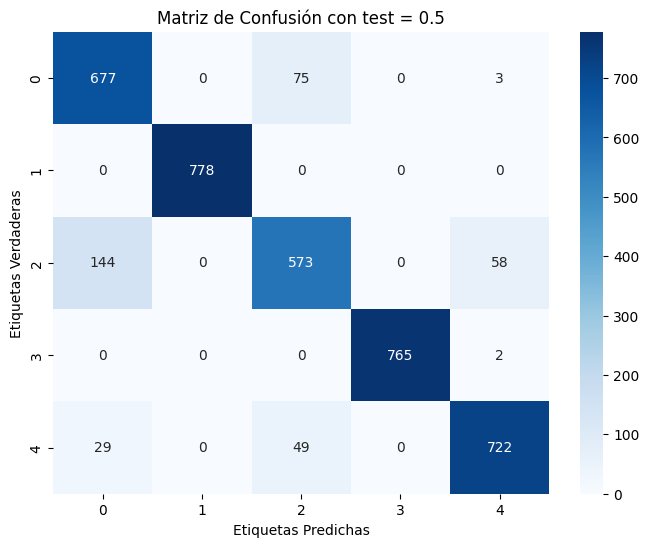

Exactitud del modelo: 0.9070967741935484
Precisión del modelo: 0.9081948021680872
Recall del modelo: 0.9070967741935484
Puntuación F1 del modelo: 0.9066122897385127
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.6.png


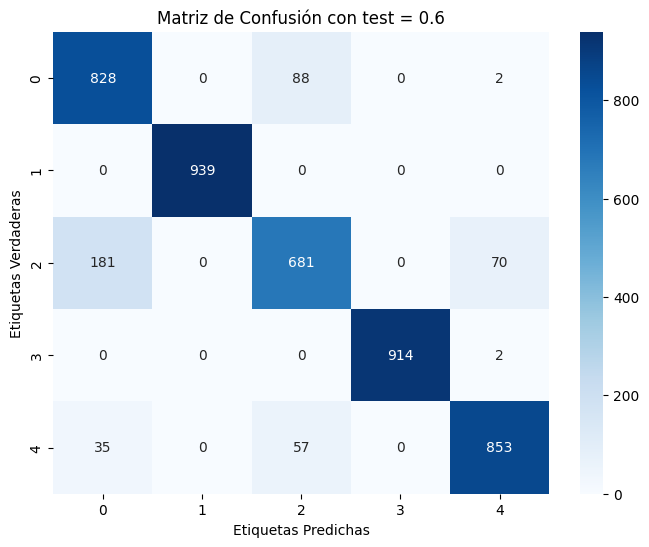

Exactitud del modelo: 0.9064516129032258
Precisión del modelo: 0.9077471664794275
Recall del modelo: 0.9064516129032258
Puntuación F1 del modelo: 0.9058253659572563
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.7.png


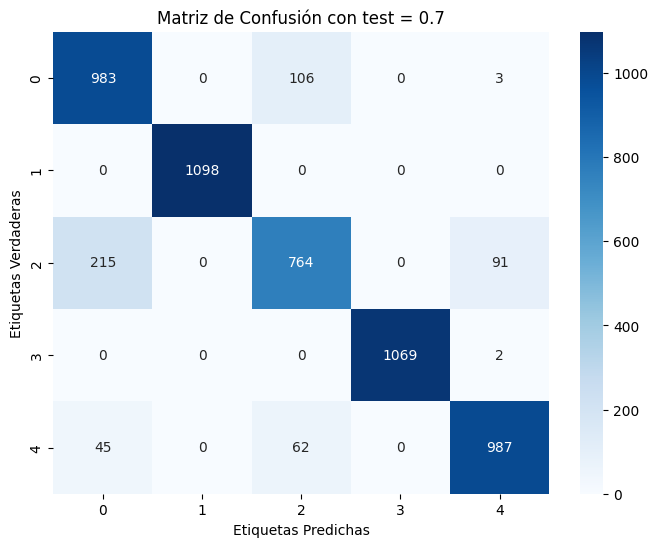

Exactitud del modelo: 0.903410138248848
Precisión del modelo: 0.9044671464643179
Recall del modelo: 0.903410138248848
Puntuación F1 del modelo: 0.9025033739596057
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.8.png


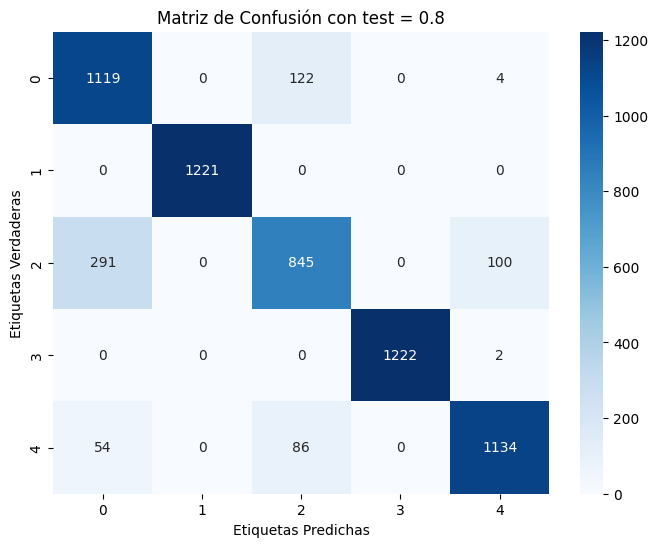

Exactitud del modelo: 0.8937096774193548
Precisión del modelo: 0.8957345172252138
Recall del modelo: 0.8937096774193548
Puntuación F1 del modelo: 0.8926499362921385
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.9.png


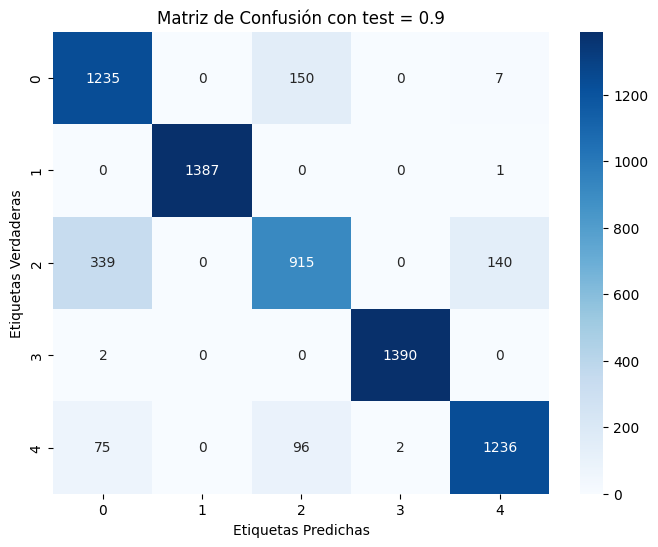

Exactitud del modelo: 0.883584229390681
Precisión del modelo: 0.8854791287557179
Recall del modelo: 0.883584229390681
Puntuación F1 del modelo: 0.882134830755809
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_3_vecinos/KNN_llama2_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_cruz_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_2.png


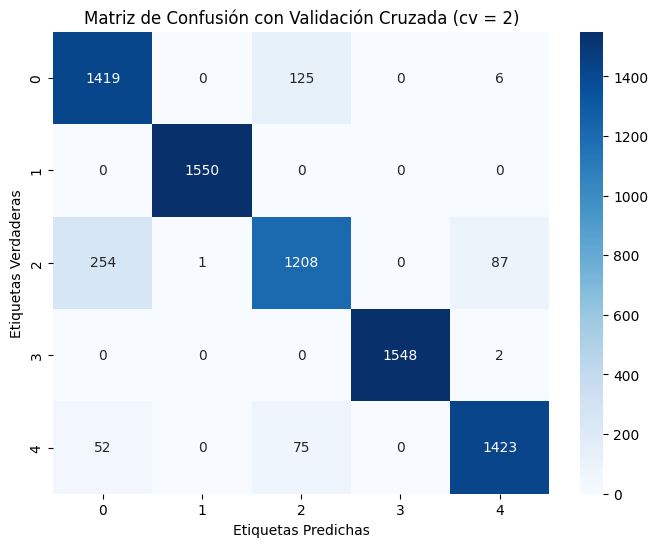

Exactitud media: 0.9223225806451613
Precisión media: 0.9234672301180165
Recall media: 0.9223225806451613
Puntuación F1 media: 0.9220010148164586
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_3.png


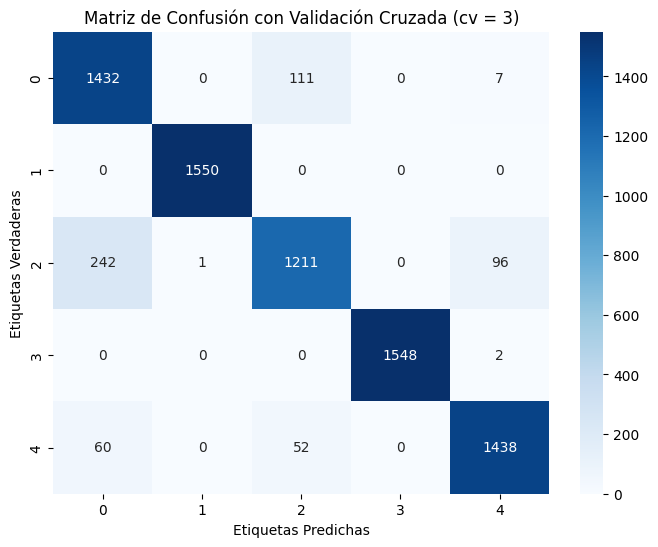

Exactitud media: 0.9263225806451613
Precisión media: 0.9277020969293184
Recall media: 0.9263225806451613
Puntuación F1 media: 0.9258596166325535
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_4.png


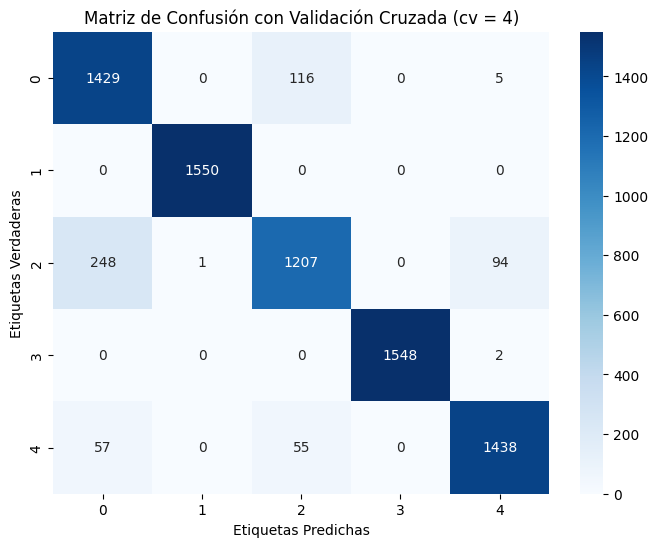

Exactitud media: 0.9254193548387096
Precisión media: 0.9267482897849418
Recall media: 0.9254193548387096
Puntuación F1 media: 0.9249622579006586
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_5.png


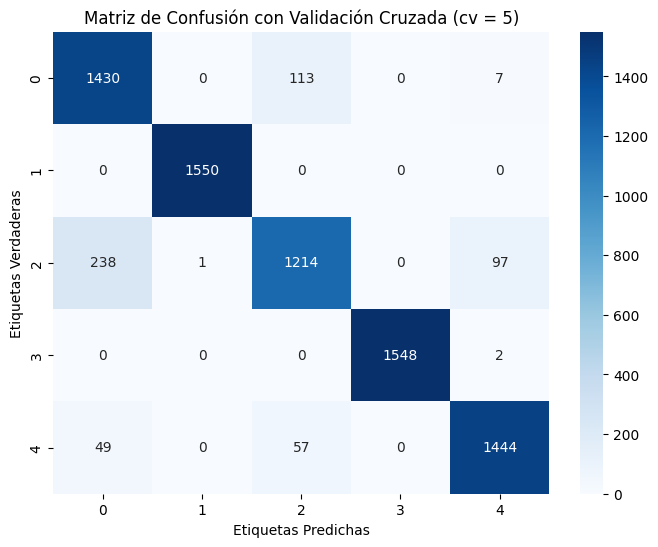

Exactitud media: 0.9272258064516129
Precisión media: 0.928196755727887
Recall media: 0.9272258064516129
Puntuación F1 media: 0.9267209839742935
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_6.png


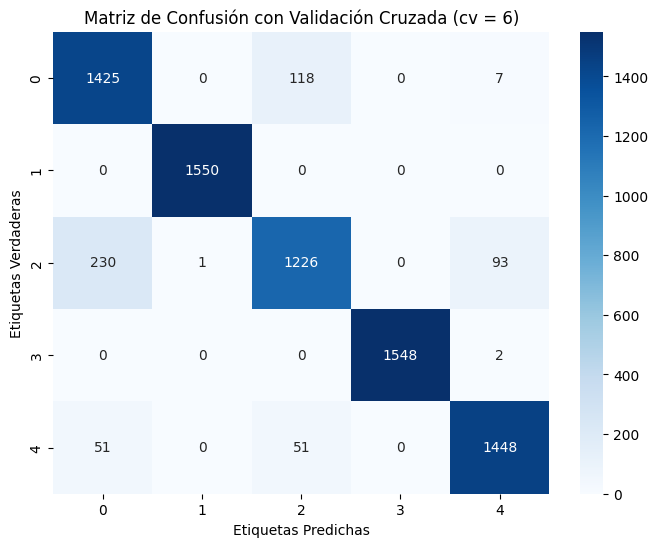

Exactitud media: 0.9286451612903226
Precisión media: 0.9295378142454817
Recall media: 0.9286451612903226
Puntuación F1 media: 0.9282260484743272
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_7.png


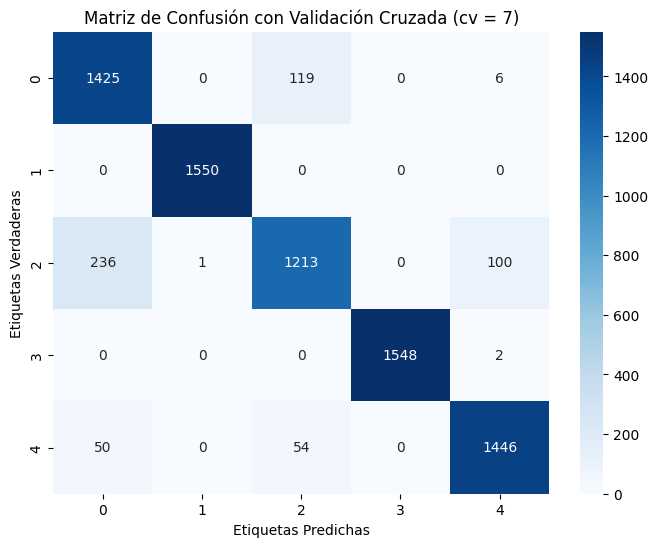

Exactitud media: 0.9267096774193548
Precisión media: 0.9275767698153511
Recall media: 0.9267096774193548
Puntuación F1 media: 0.9261984591685531
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_8.png


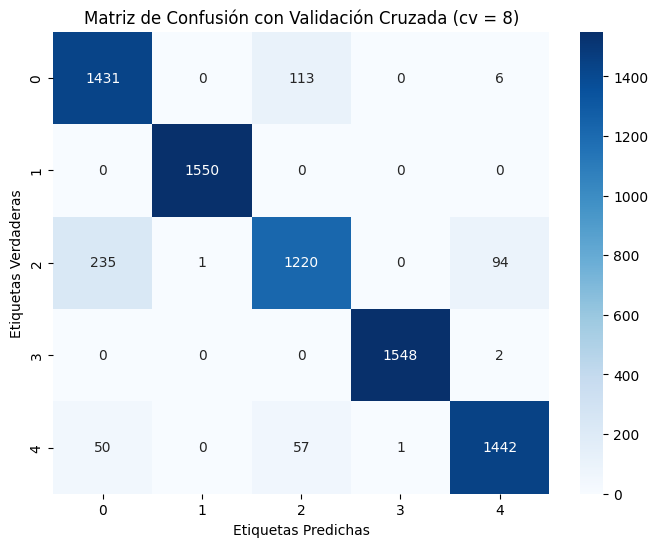

Exactitud media: 0.9278709677419354
Precisión media: 0.9288522852718358
Recall media: 0.9278709677419354
Puntuación F1 media: 0.9274138849533887
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_9.png


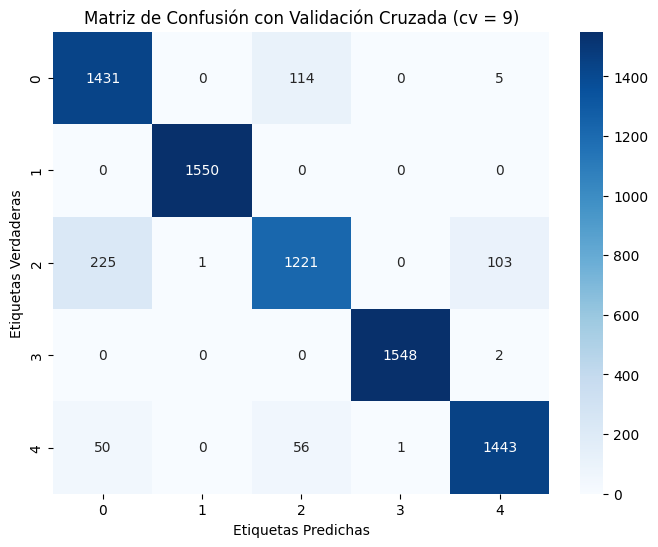

Exactitud media: 0.9281290322580645
Precisión media: 0.9288938025125905
Recall media: 0.9281290322580645
Puntuación F1 media: 0.9276199188784976
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_10.png


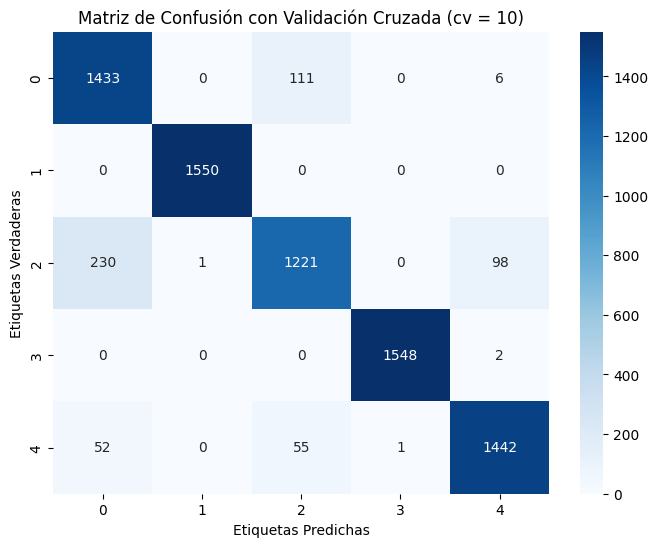

Exactitud media: 0.928258064516129
Precisión media: 0.9292239938480364
Recall media: 0.928258064516129
Puntuación F1 media: 0.9277776225660856
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_3_vecinos/KNN_llama2_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_simple_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.1.png


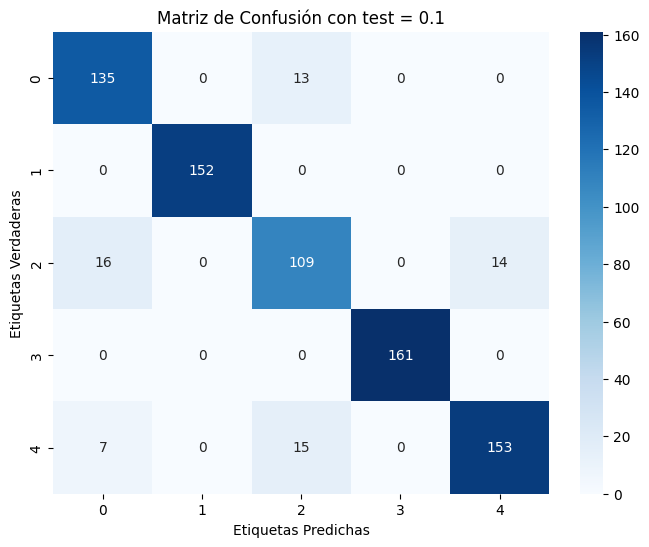

Exactitud del modelo: 0.9161290322580645
Precisión del modelo: 0.9166145527687862
Recall del modelo: 0.9161290322580645
Puntuación F1 del modelo: 0.9160735970774225
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.2.png


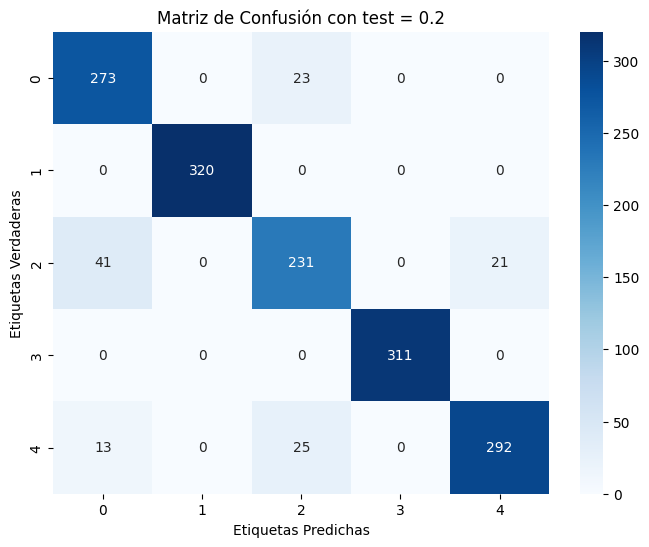

Exactitud del modelo: 0.9206451612903226
Precisión del modelo: 0.9216581218223459
Recall del modelo: 0.9206451612903226
Puntuación F1 del modelo: 0.9205094443221439
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.3.png


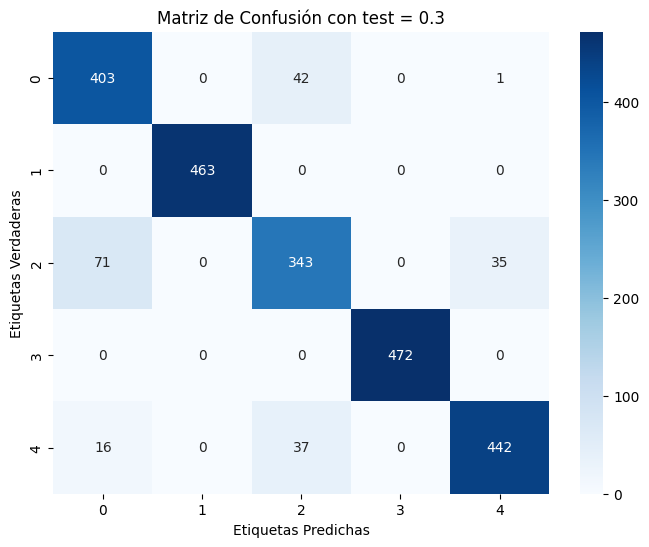

Exactitud del modelo: 0.9131182795698924
Precisión del modelo: 0.9137537237850569
Recall del modelo: 0.9131182795698924
Puntuación F1 del modelo: 0.912864804070299
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.4.png


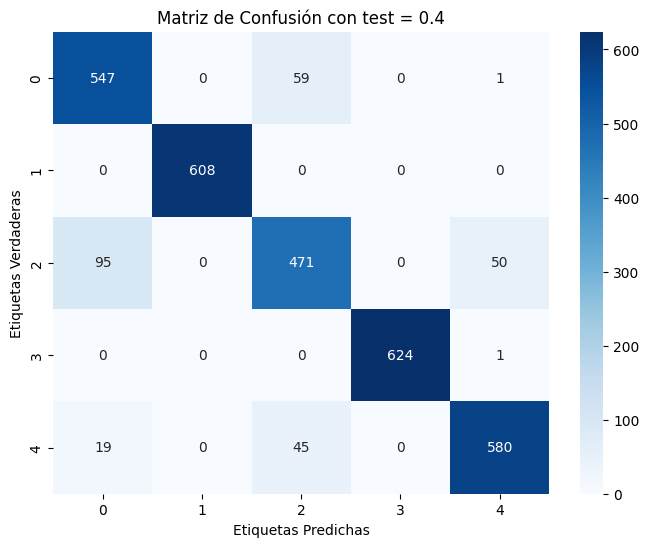

Exactitud del modelo: 0.9129032258064517
Precisión del modelo: 0.9131968283644776
Recall del modelo: 0.9129032258064517
Puntuación F1 del modelo: 0.9125397736278555
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.5.png


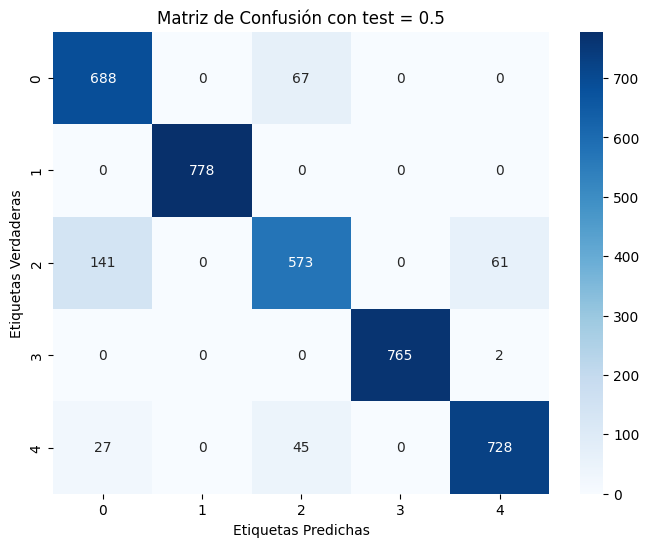

Exactitud del modelo: 0.911483870967742
Precisión del modelo: 0.9126168483303475
Recall del modelo: 0.911483870967742
Puntuación F1 del modelo: 0.9107884695539791
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.6.png


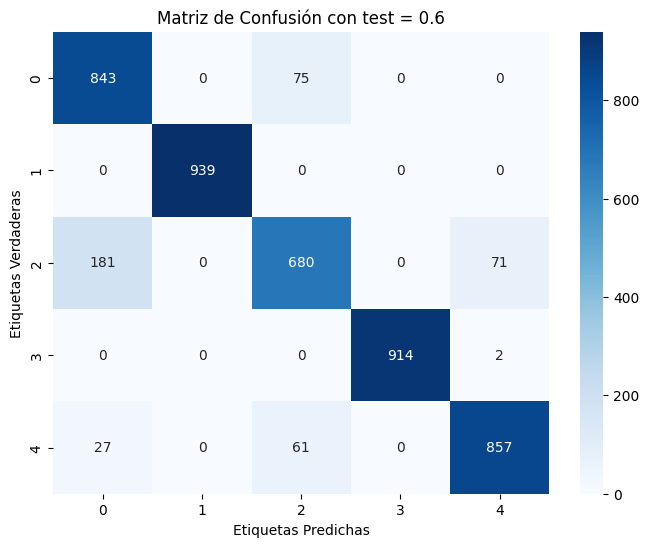

Exactitud del modelo: 0.9103225806451613
Precisión del modelo: 0.9115722249009608
Recall del modelo: 0.9103225806451613
Puntuación F1 del modelo: 0.9094706801370425
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.7.png


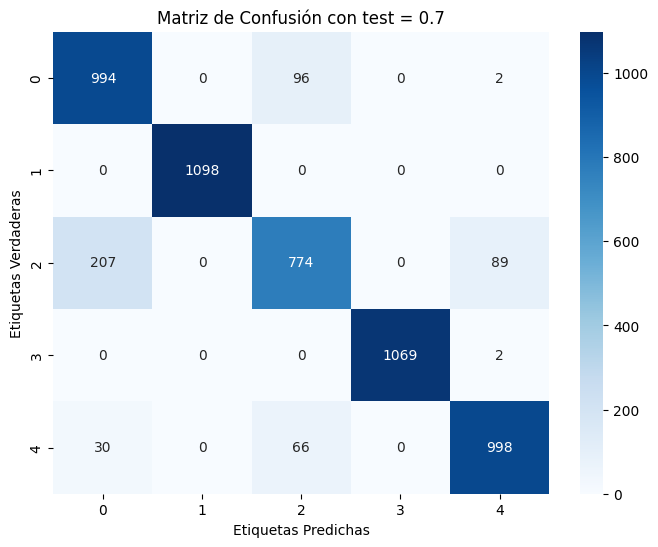

Exactitud del modelo: 0.9093087557603686
Precisión del modelo: 0.9099194715943009
Recall del modelo: 0.9093087557603686
Puntuación F1 del modelo: 0.9083124071057926
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.8.png


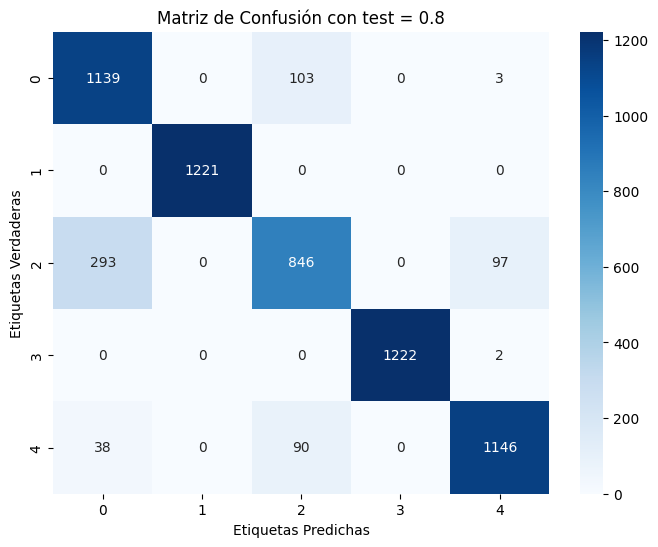

Exactitud del modelo: 0.8990322580645161
Precisión del modelo: 0.9009587782379244
Recall del modelo: 0.8990322580645161
Puntuación F1 del modelo: 0.8976902213085248
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.9.png


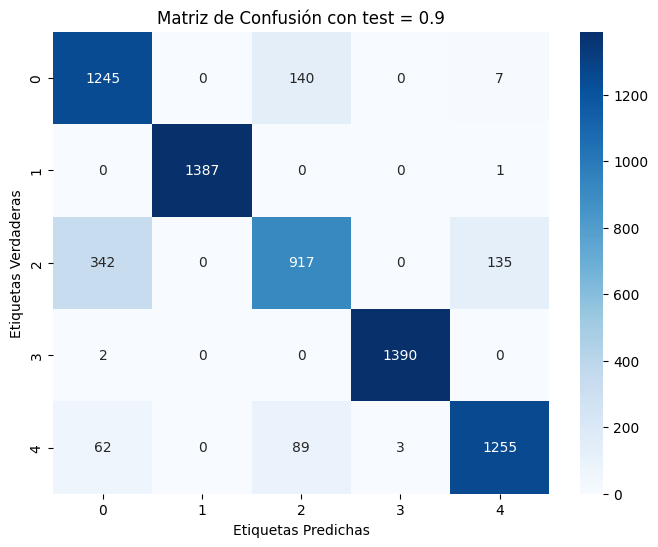

Exactitud del modelo: 0.8880286738351254
Precisión del modelo: 0.8898941006567678
Recall del modelo: 0.8880286738351254
Puntuación F1 del modelo: 0.8863779908125639
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_5_vecinos/KNN_llama2_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_cruz_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_2.png


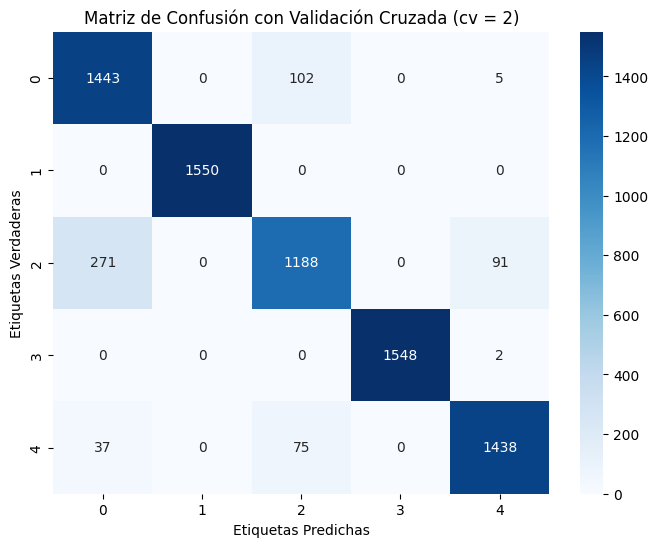

Exactitud media: 0.9247741935483871
Precisión media: 0.9261256201976682
Recall media: 0.9247741935483871
Puntuación F1 media: 0.9241360056372209
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_3.png


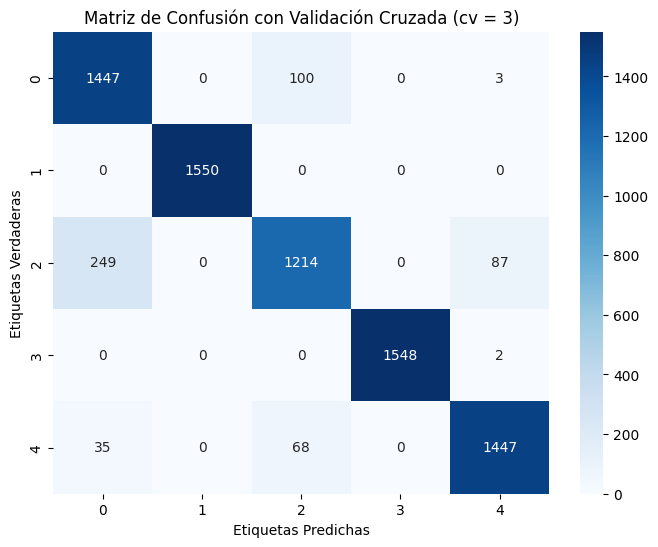

Exactitud media: 0.9298064516129032
Precisión media: 0.930918191429364
Recall media: 0.9298064516129032
Puntuación F1 media: 0.9292758072221984
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_4.png


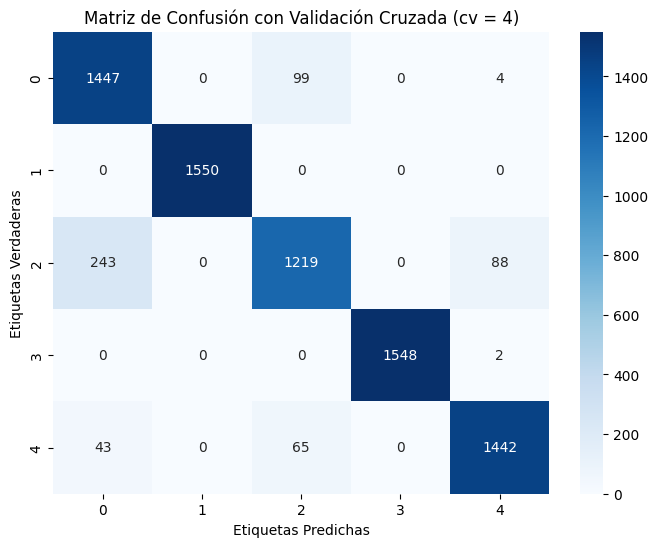

Exactitud media: 0.9298064516129032
Precisión media: 0.9310375110853747
Recall media: 0.9298064516129032
Puntuación F1 media: 0.9293278310068006
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_5.png


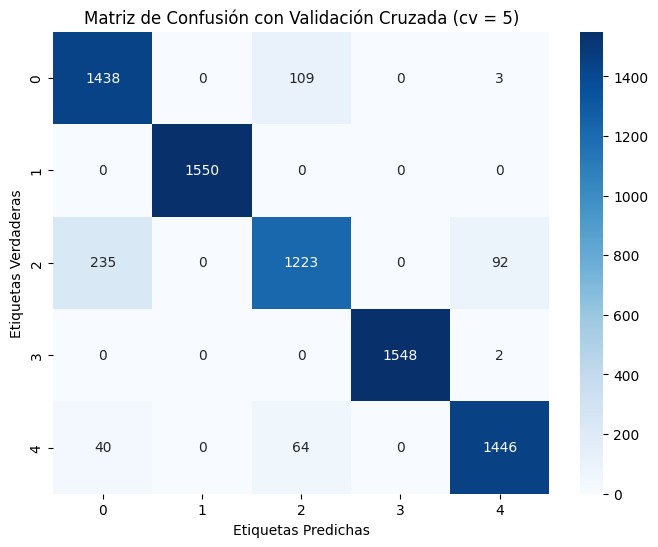

Exactitud media: 0.9296774193548387
Precisión media: 0.9305345759039648
Recall media: 0.9296774193548387
Puntuación F1 media: 0.9292089603362511
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_6.png


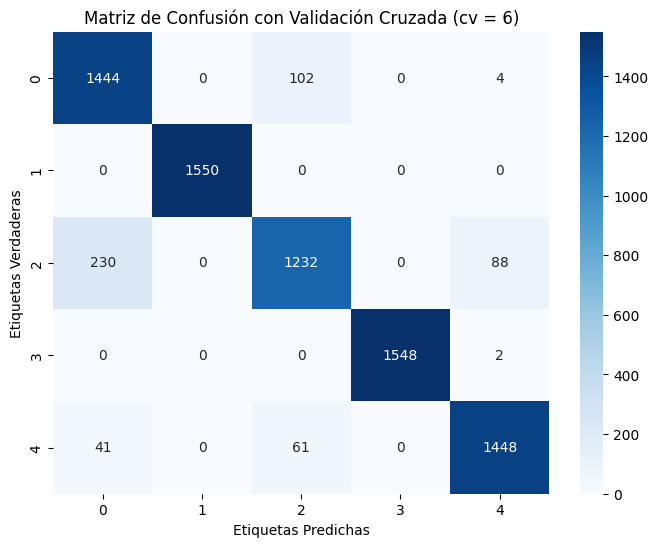

Exactitud media: 0.9318709677419355
Precisión media: 0.9328353673350254
Recall media: 0.9318709677419355
Puntuación F1 media: 0.9314340562333042
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_7.png


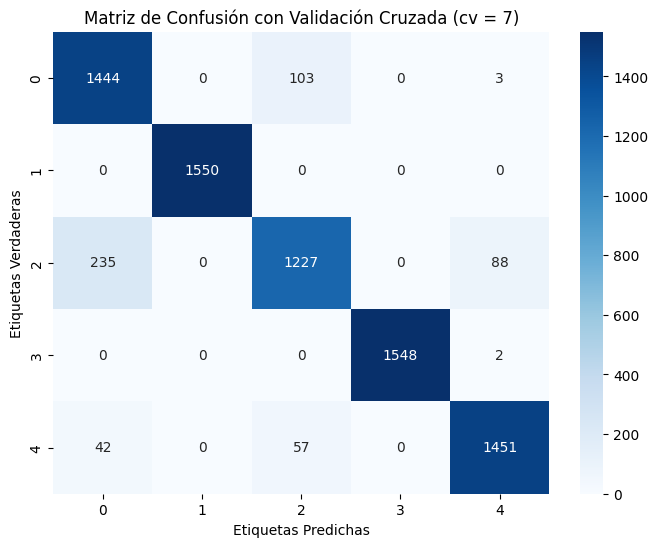

Exactitud media: 0.9316129032258065
Precisión media: 0.9326914039347287
Recall media: 0.9316129032258065
Puntuación F1 media: 0.9311511463365867
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_8.png


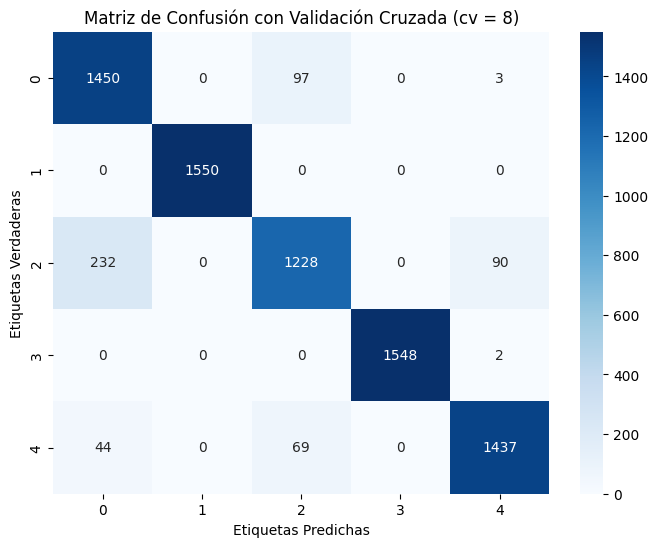

Exactitud media: 0.9307096774193548
Precisión media: 0.9318000953933621
Recall media: 0.9307096774193548
Puntuación F1 media: 0.9302661588261422
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_9.png


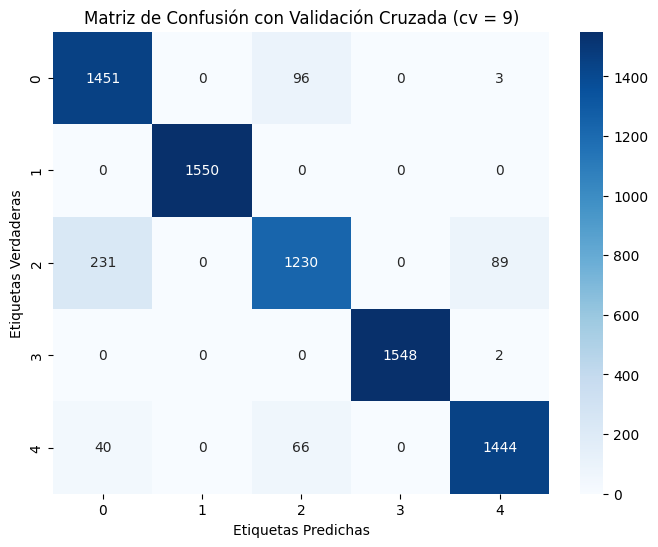

Exactitud media: 0.932
Precisión media: 0.9330254417948999
Recall media: 0.932
Puntuación F1 media: 0.9315345543576931
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_10.png


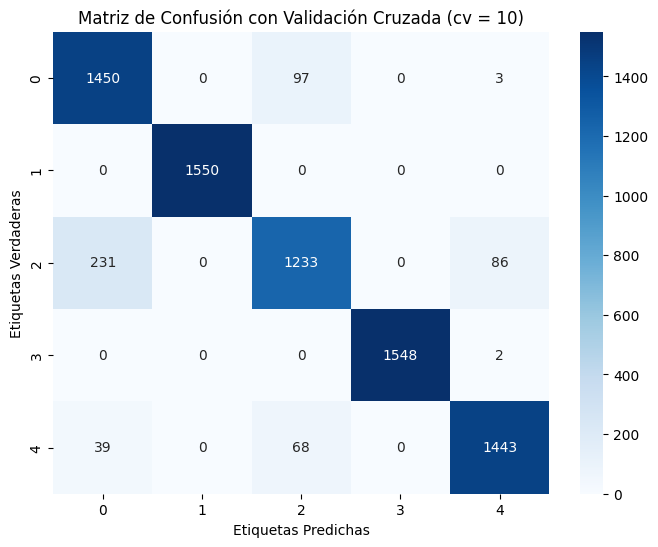

Exactitud media: 0.9321290322580645
Precisión media: 0.9331350941685375
Recall media: 0.9321290322580645
Puntuación F1 media: 0.9317003124113347
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_5_vecinos/KNN_llama2_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_simple_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.1.png


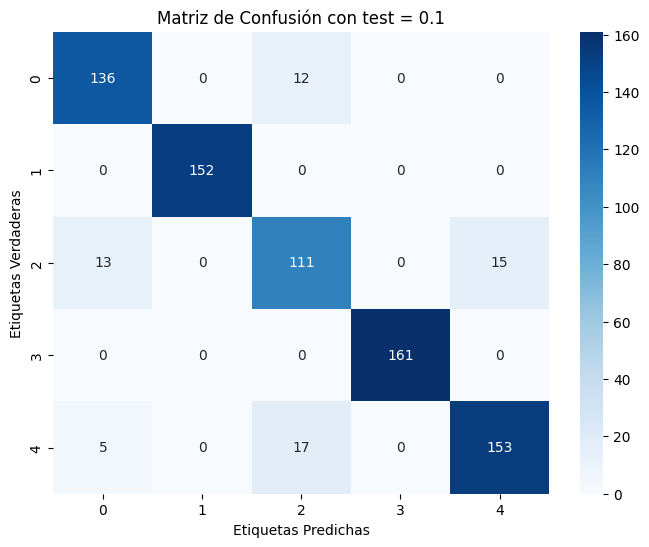

Exactitud del modelo: 0.92
Precisión del modelo: 0.9203657310431504
Recall del modelo: 0.92
Puntuación F1 del modelo: 0.920029177757754
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.2.png


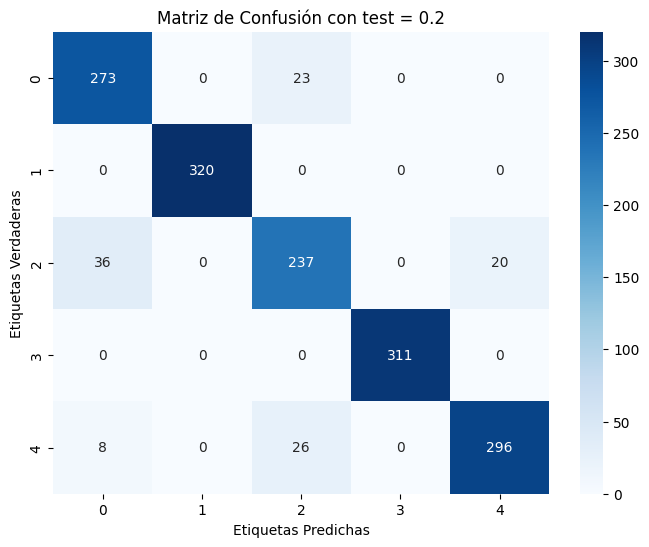

Exactitud del modelo: 0.9270967741935484
Precisión del modelo: 0.9276319031288742
Recall del modelo: 0.9270967741935484
Puntuación F1 del modelo: 0.9270501807994973
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.3.png


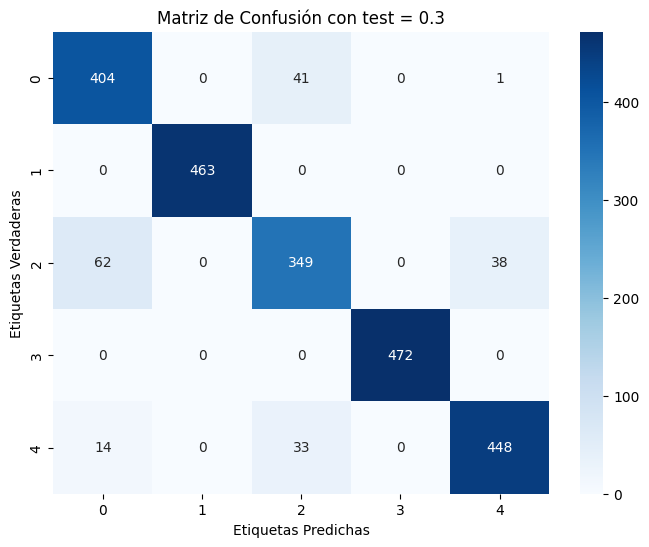

Exactitud del modelo: 0.9187096774193548
Precisión del modelo: 0.9187932098460947
Recall del modelo: 0.9187096774193548
Puntuación F1 del modelo: 0.9183750384942947
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.4.png


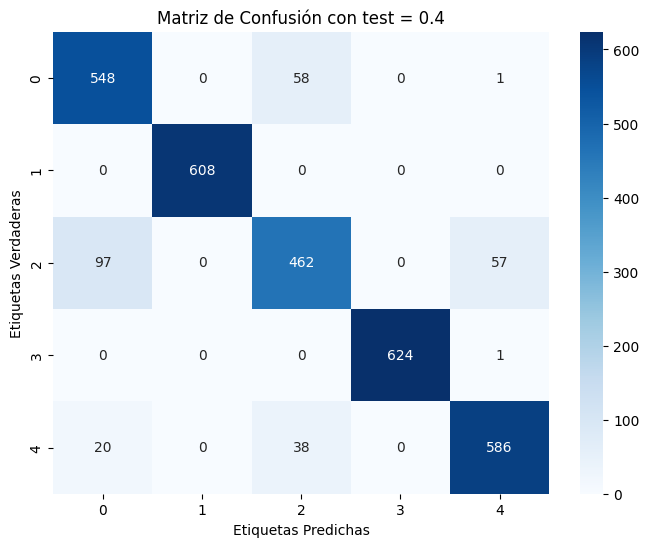

Exactitud del modelo: 0.912258064516129
Precisión del modelo: 0.9123604804912117
Recall del modelo: 0.912258064516129
Puntuación F1 del modelo: 0.9115748689777093
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.5.png


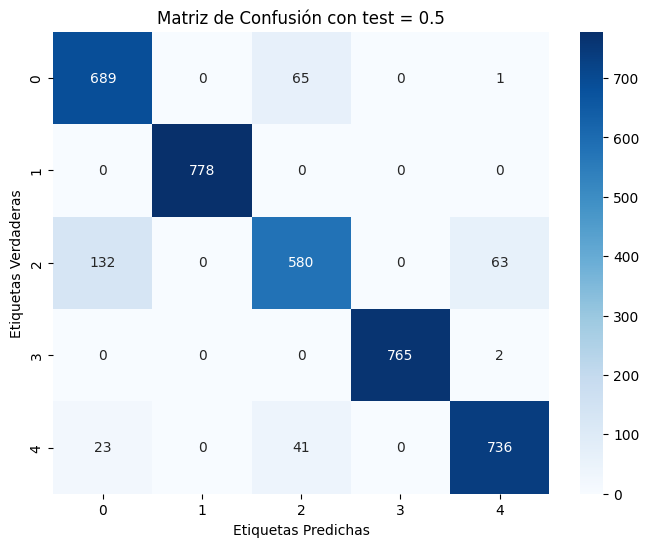

Exactitud del modelo: 0.9156129032258065
Precisión del modelo: 0.9163244357857071
Recall del modelo: 0.9156129032258065
Puntuación F1 del modelo: 0.9148547649014891
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.6.png


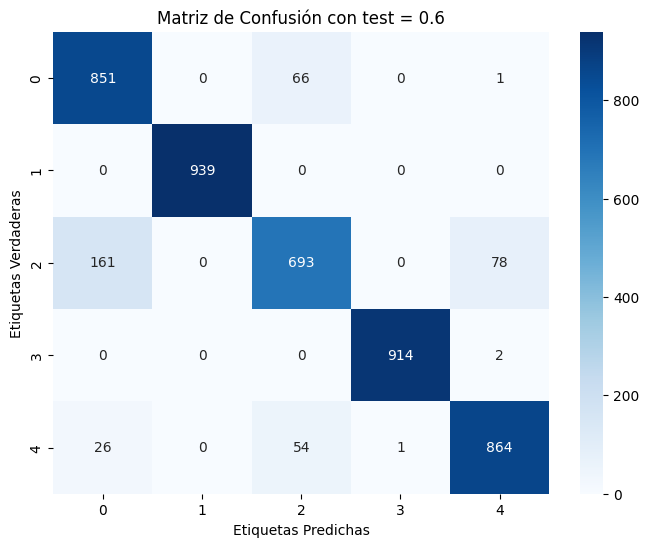

Exactitud del modelo: 0.9163440860215054
Precisión del modelo: 0.917215662057612
Recall del modelo: 0.9163440860215054
Puntuación F1 del modelo: 0.9153870145390199
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.7.png


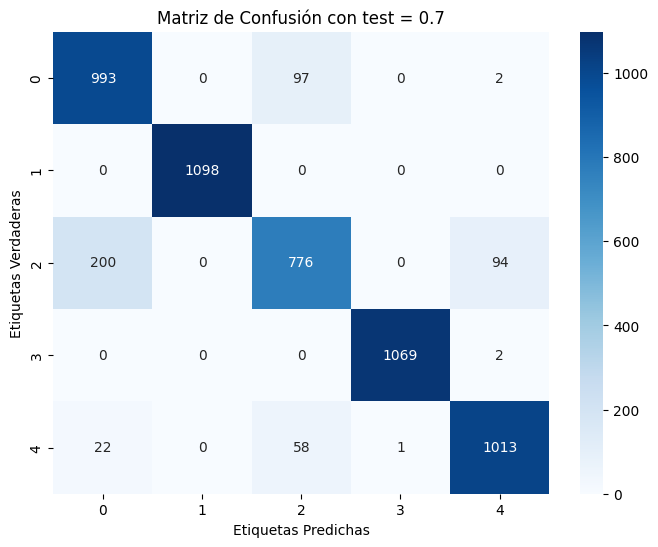

Exactitud del modelo: 0.912258064516129
Precisión del modelo: 0.9124112269899778
Recall del modelo: 0.912258064516129
Puntuación F1 del modelo: 0.9110878500847845
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.8.png


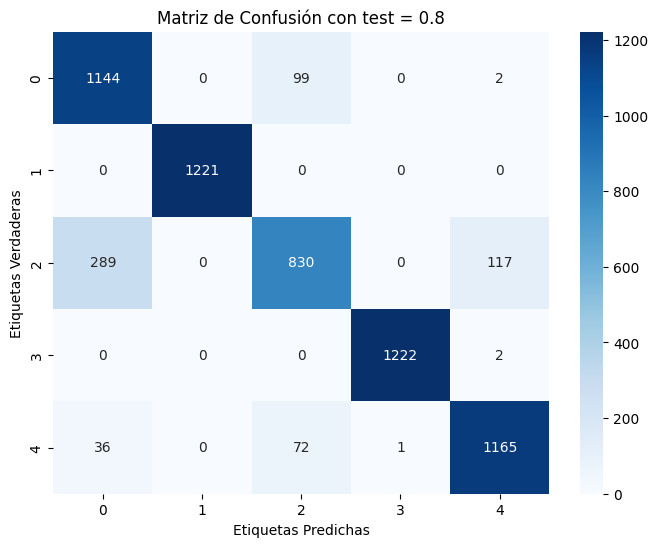

Exactitud del modelo: 0.9003225806451612
Precisión del modelo: 0.9020227309263996
Recall del modelo: 0.9003225806451612
Puntuación F1 del modelo: 0.8983566248455014
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.9.png


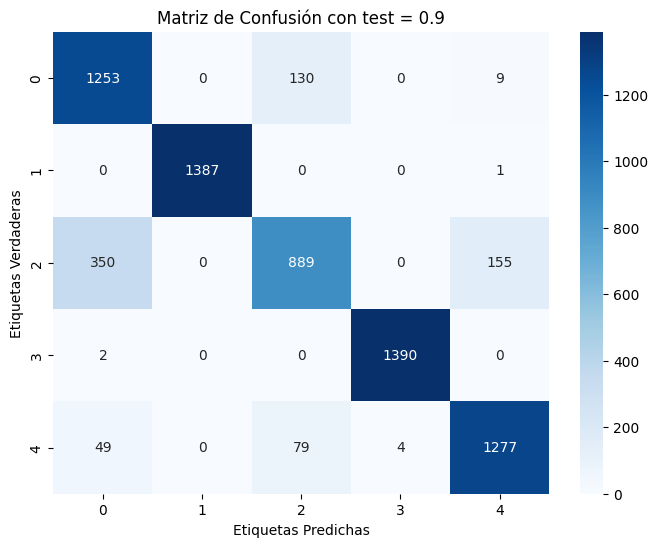

Exactitud del modelo: 0.8883154121863799
Precisión del modelo: 0.8898866315784542
Recall del modelo: 0.8883154121863799
Puntuación F1 del modelo: 0.8858122221981038
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_7_vecinos/KNN_llama2_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_cruz_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_2.png


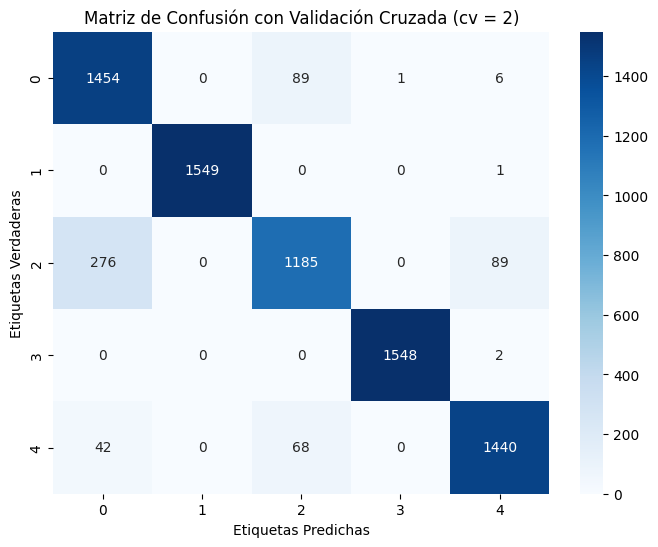

Exactitud media: 0.9259354838709677
Precisión media: 0.9278374998772526
Recall media: 0.9259354838709677
Puntuación F1 media: 0.925246020427434
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_3.png


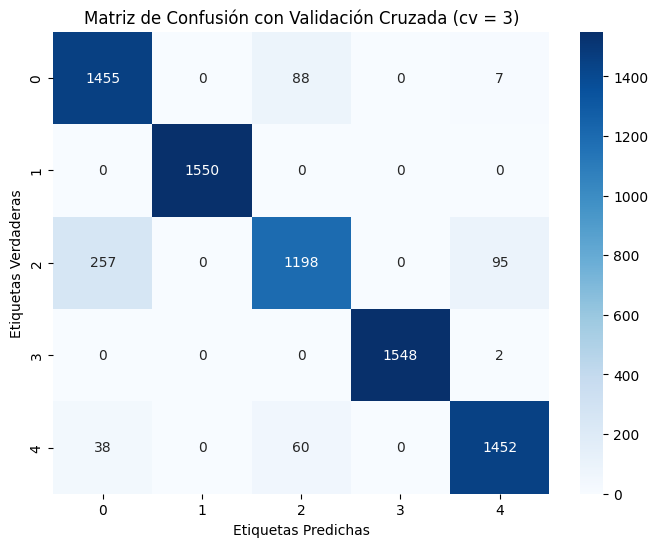

Exactitud media: 0.9294193548387096
Precisión media: 0.9309270203358219
Recall media: 0.9294193548387096
Puntuación F1 media: 0.9286970509998448
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_4.png


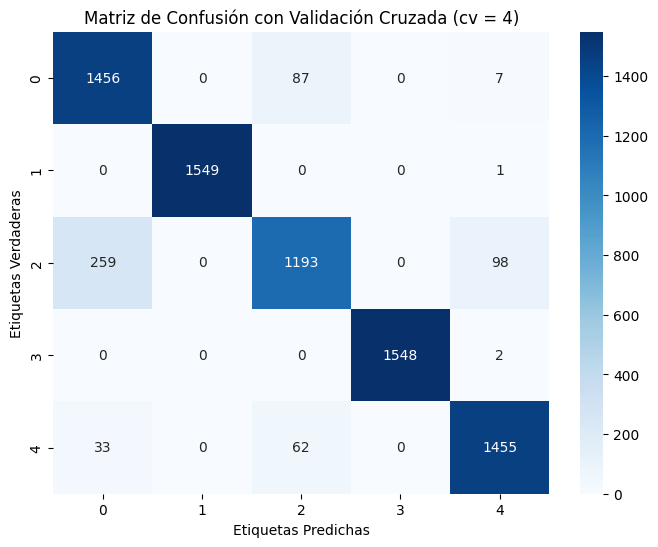

Exactitud media: 0.9291612903225807
Precisión media: 0.9305651480916237
Recall media: 0.9291612903225807
Puntuación F1 media: 0.9283630553931239
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_5.png


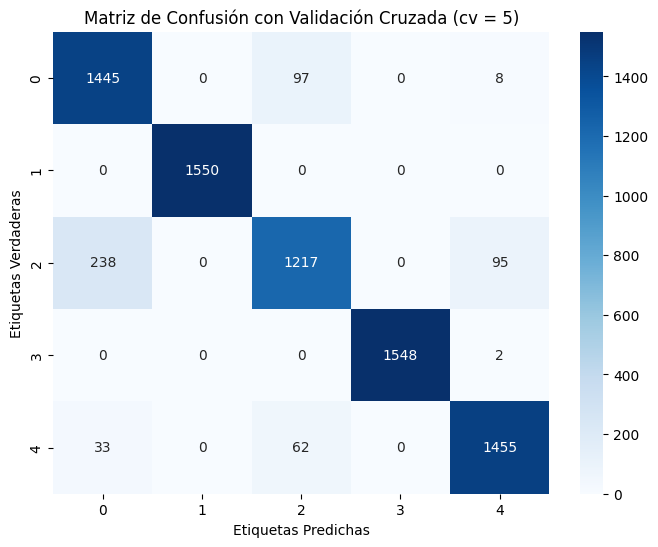

Exactitud media: 0.9309677419354838
Precisión media: 0.9318429148371008
Recall media: 0.9309677419354838
Puntuación F1 media: 0.9303545125760722
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_6.png


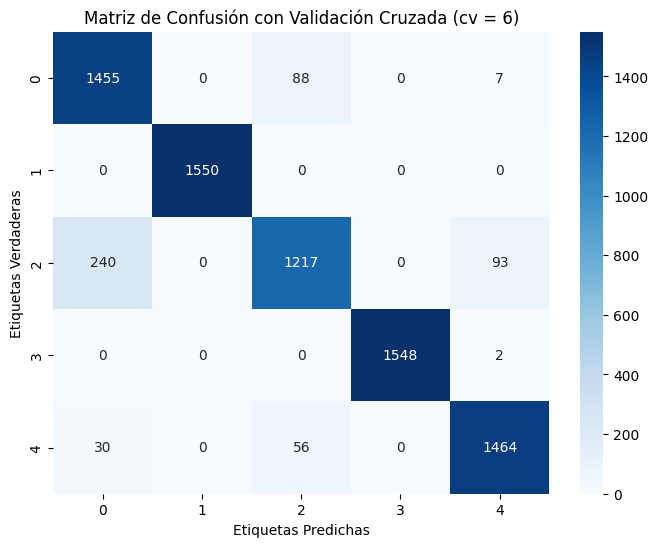

Exactitud media: 0.9334193548387096
Precisión media: 0.9345079211557581
Recall media: 0.9334193548387096
Puntuación F1 media: 0.9327418126438375
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_7.png


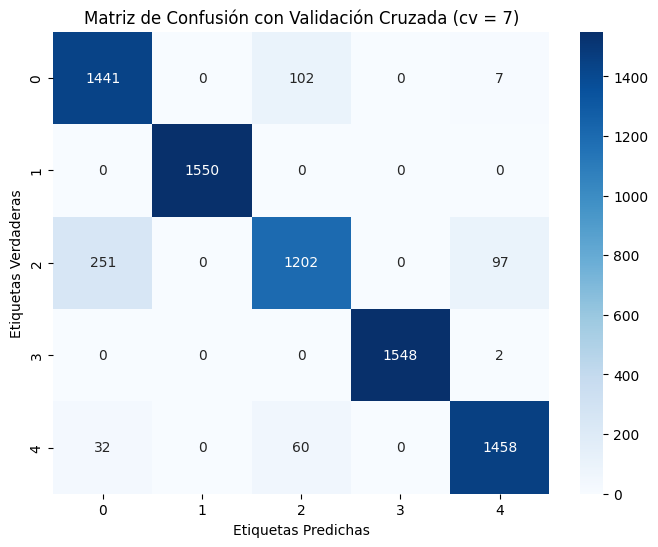

Exactitud media: 0.9289032258064516
Precisión media: 0.9298607206484583
Recall media: 0.9289032258064516
Puntuación F1 media: 0.9282044465991313
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_8.png


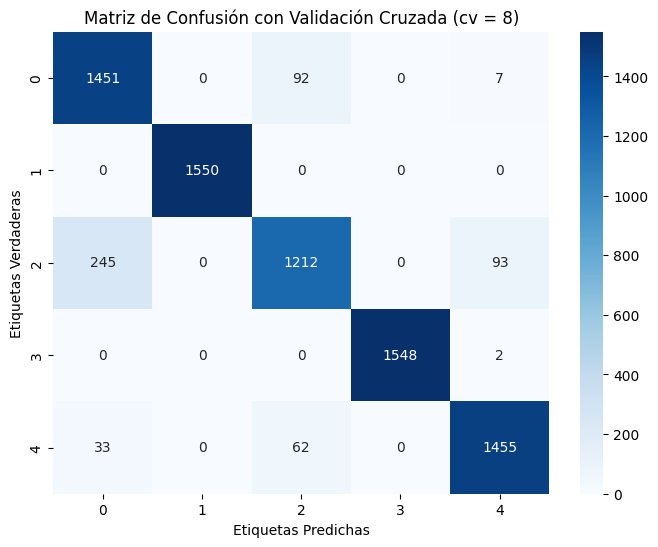

Exactitud media: 0.9310967741935484
Precisión media: 0.9321929799842479
Recall media: 0.9310967741935484
Puntuación F1 media: 0.9304501701754031
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_9.png


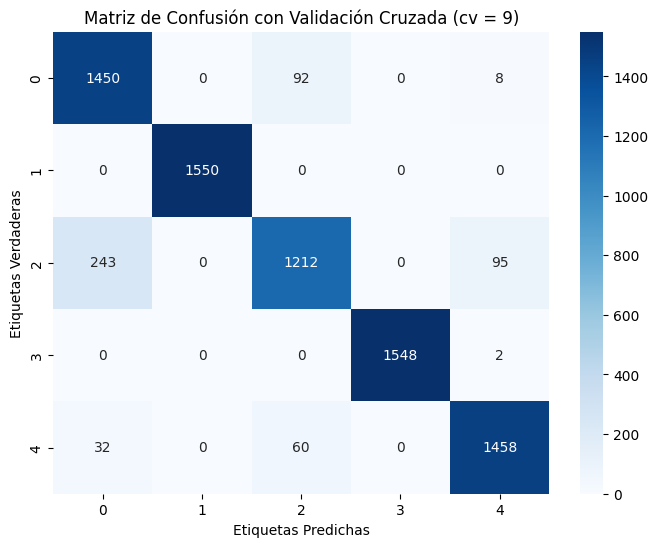

Exactitud media: 0.9313548387096774
Precisión media: 0.9323928514238443
Recall media: 0.9313548387096774
Puntuación F1 media: 0.9306827716210558
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_10.png


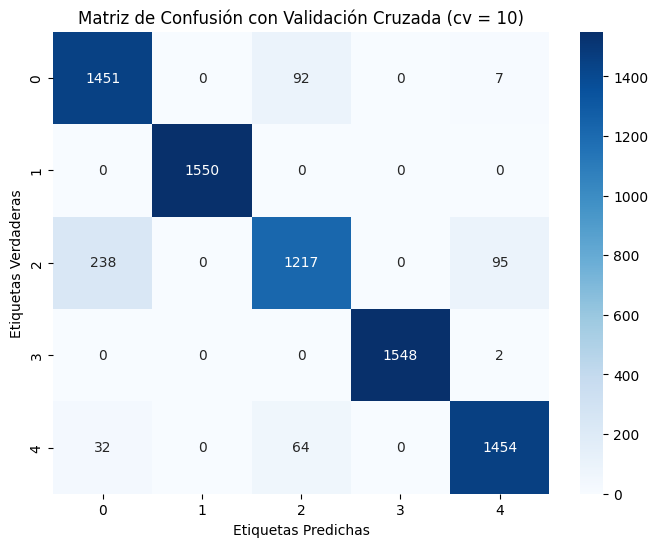

Exactitud media: 0.9316129032258065
Precisión media: 0.9325484822457767
Recall media: 0.9316129032258065
Puntuación F1 media: 0.9309801886671408
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_7_vecinos/KNN_llama2_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_simple_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.1.png


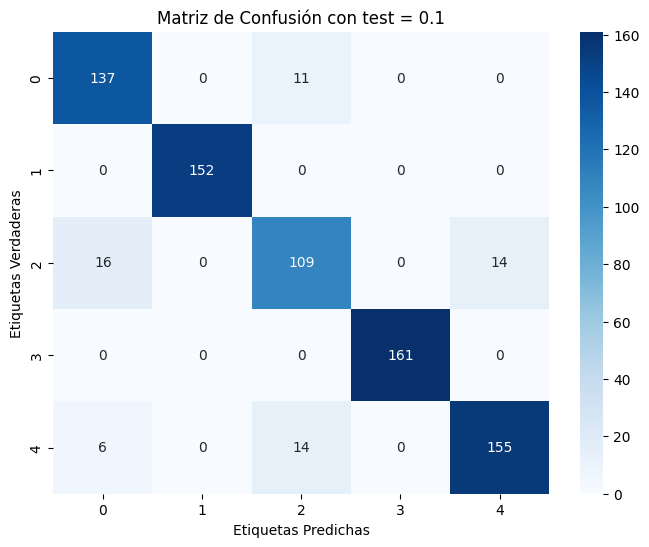

Exactitud del modelo: 0.9212903225806451
Precisión del modelo: 0.921409206887229
Recall del modelo: 0.9212903225806451
Puntuación F1 del modelo: 0.9210206846195567
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.2.png


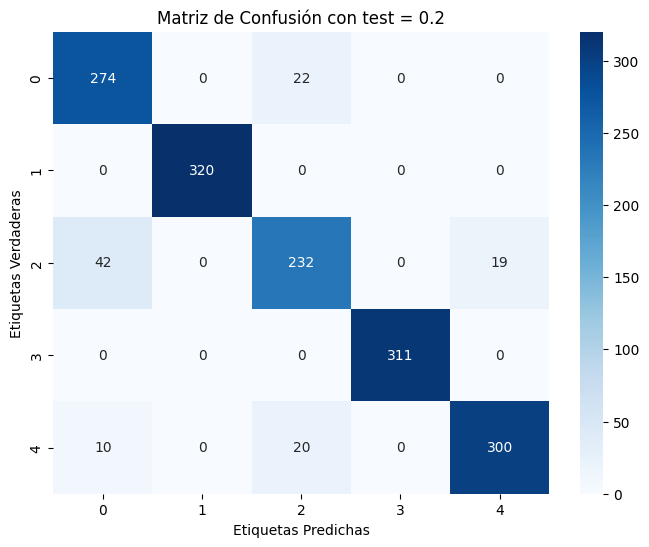

Exactitud del modelo: 0.9270967741935484
Precisión del modelo: 0.9278823838069049
Recall del modelo: 0.9270967741935484
Puntuación F1 del modelo: 0.9268668142709855
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.3.png


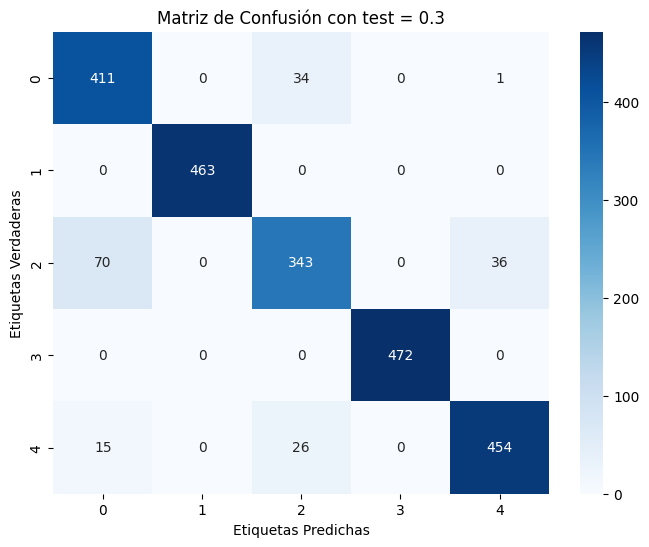

Exactitud del modelo: 0.9217204301075269
Precisión del modelo: 0.922330532253527
Recall del modelo: 0.9217204301075269
Puntuación F1 del modelo: 0.9210947431003774
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.4.png


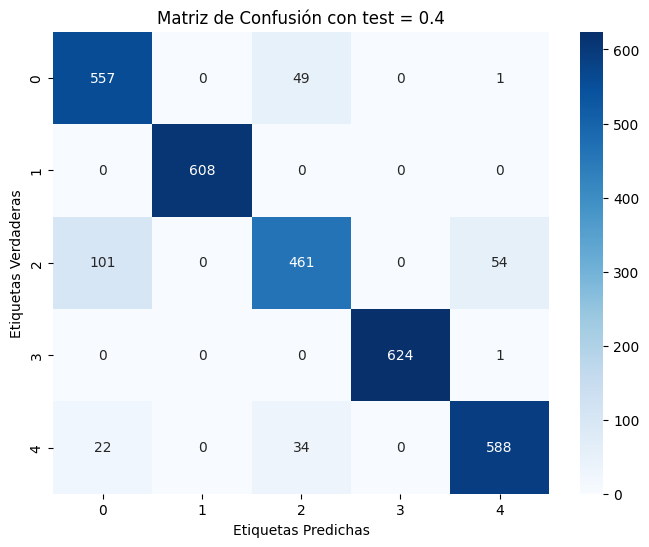

Exactitud del modelo: 0.915483870967742
Precisión del modelo: 0.916199715370019
Recall del modelo: 0.915483870967742
Puntuación F1 del modelo: 0.9146837948998592
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.5.png


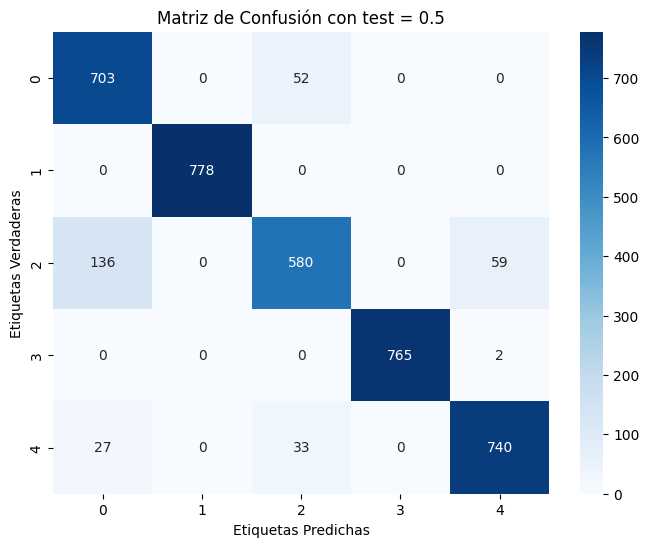

Exactitud del modelo: 0.920258064516129
Precisión del modelo: 0.9220409326787926
Recall del modelo: 0.920258064516129
Puntuación F1 del modelo: 0.9194072866442785
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.6.png


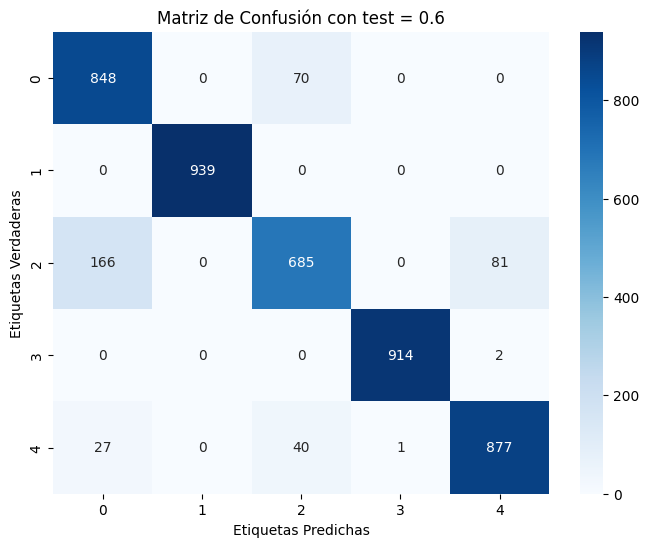

Exactitud del modelo: 0.9167741935483871
Precisión del modelo: 0.9178803960953098
Recall del modelo: 0.9167741935483871
Puntuación F1 del modelo: 0.9156322737978904
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.7.png


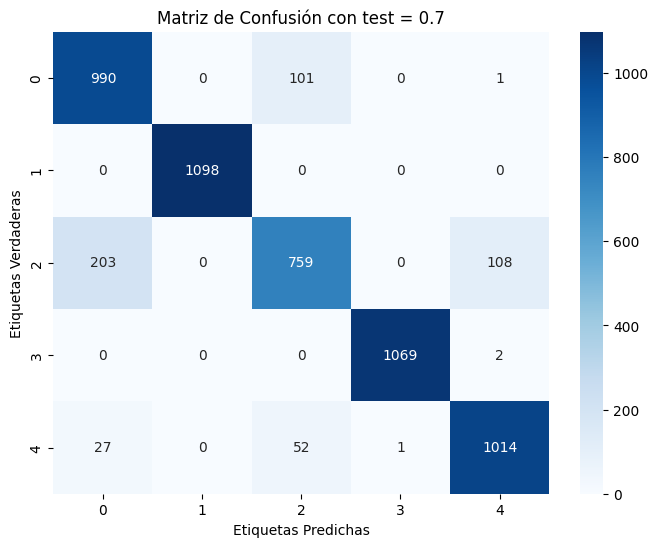

Exactitud del modelo: 0.9087557603686636
Precisión del modelo: 0.908881530079418
Recall del modelo: 0.9087557603686636
Puntuación F1 del modelo: 0.9072865106529693
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.8.png


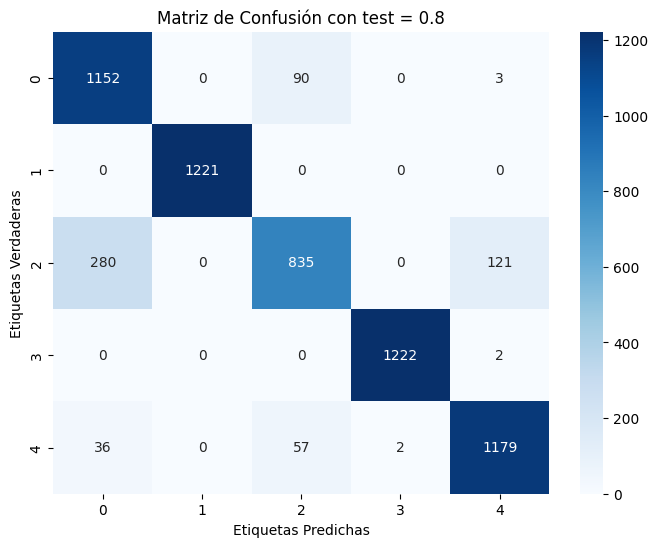

Exactitud del modelo: 0.9046774193548387
Precisión del modelo: 0.9067699072556873
Recall del modelo: 0.9046774193548387
Puntuación F1 del modelo: 0.9025418809503636
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.9.png


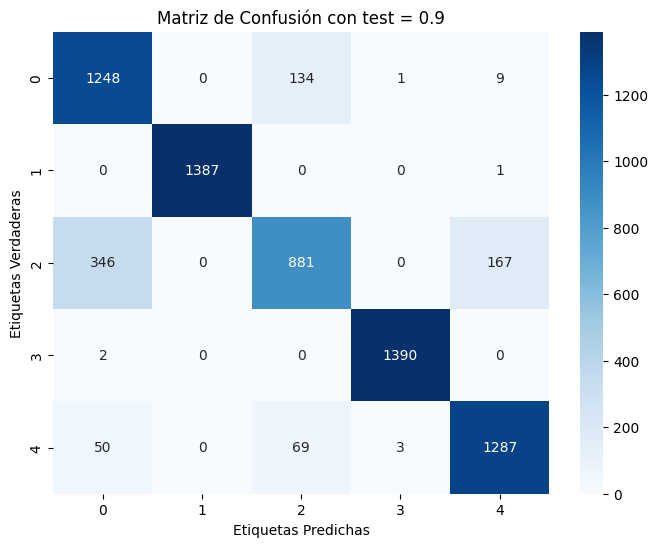

Exactitud del modelo: 0.8878853046594982
Precisión del modelo: 0.8893216618540549
Recall del modelo: 0.8878853046594982
Puntuación F1 del modelo: 0.8851233714806841
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_9_vecinos/KNN_llama2_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_cruz_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_2.png


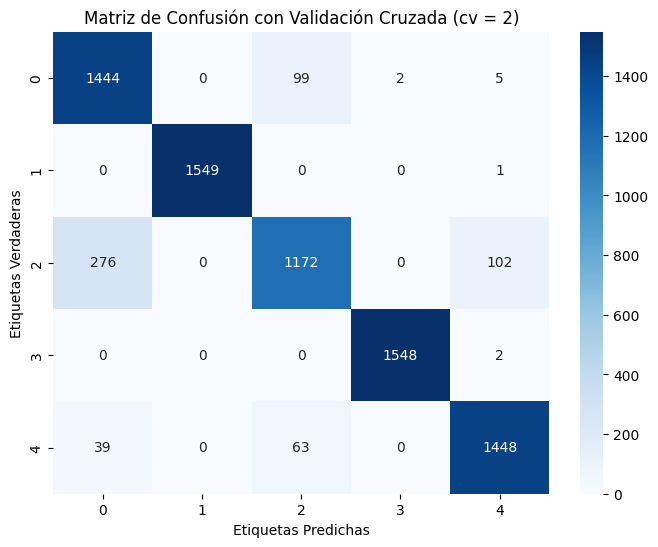

Exactitud media: 0.924
Precisión media: 0.9255176074551045
Recall media: 0.924
Puntuación F1 media: 0.9231414419857245
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_3.png


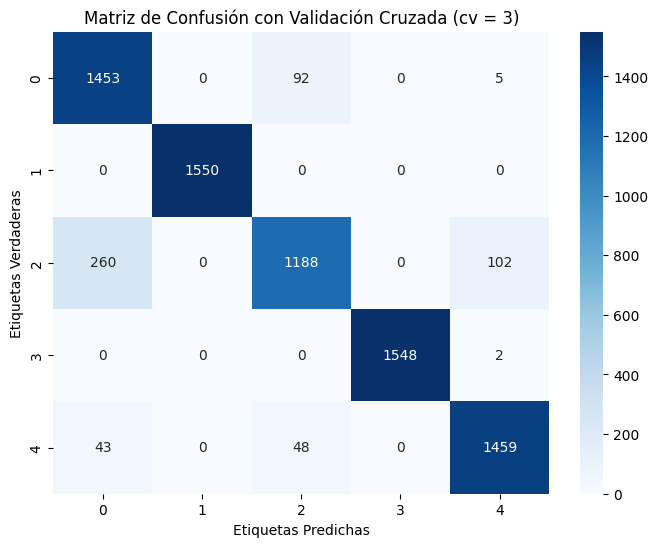

Exactitud media: 0.9287741935483871
Precisión media: 0.9305023508566366
Recall media: 0.9287741935483871
Puntuación F1 media: 0.9279583839302585
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_4.png


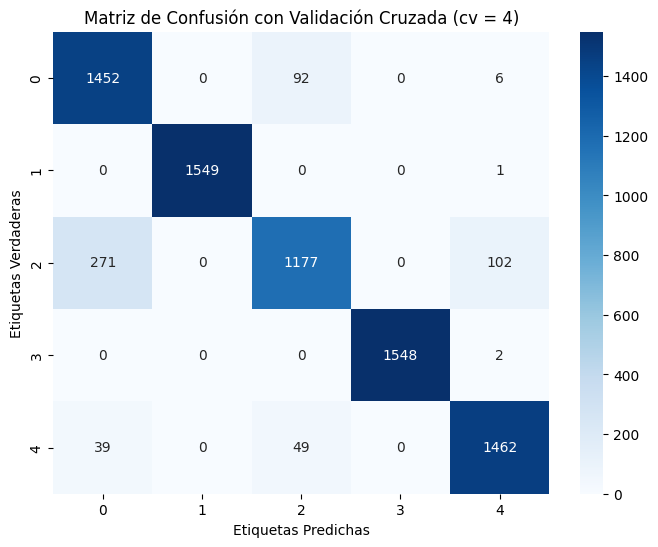

Exactitud media: 0.927483870967742
Precisión media: 0.9293034986304041
Recall media: 0.927483870967742
Puntuación F1 media: 0.9265807164903668
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_5.png


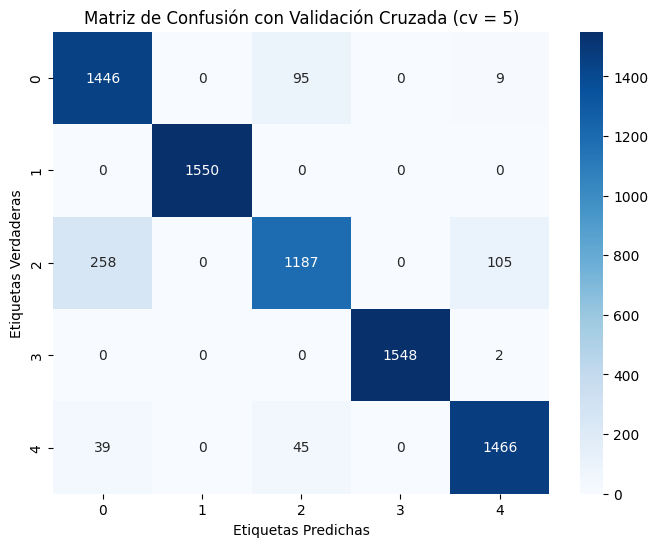

Exactitud media: 0.9286451612903226
Precisión media: 0.9301556190512769
Recall media: 0.9286451612903226
Puntuación F1 media: 0.9277778210968892
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_6.png


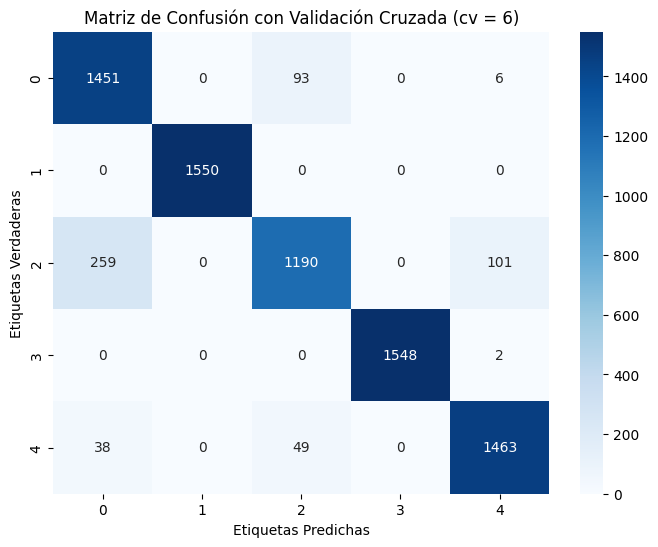

Exactitud media: 0.9292903225806451
Precisión media: 0.9308293008364628
Recall media: 0.9292903225806451
Puntuación F1 media: 0.9284633575482132
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_7.png


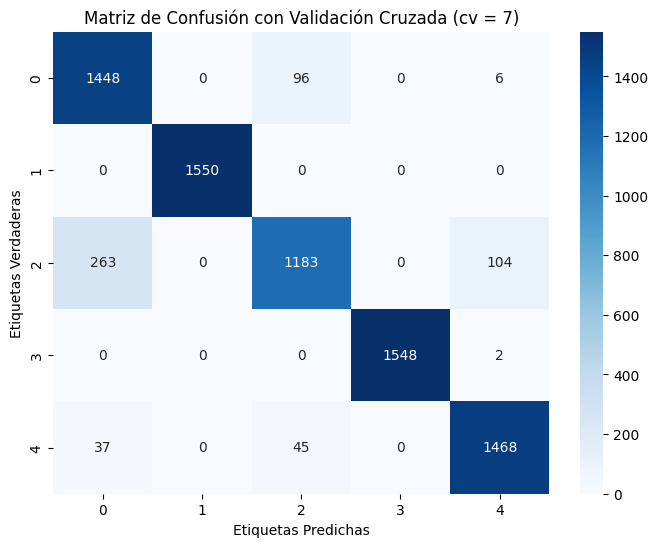

Exactitud media: 0.9286451612903226
Precisión media: 0.9301987483627754
Recall media: 0.9286451612903226
Puntuación F1 media: 0.9277448805659528
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_8.png


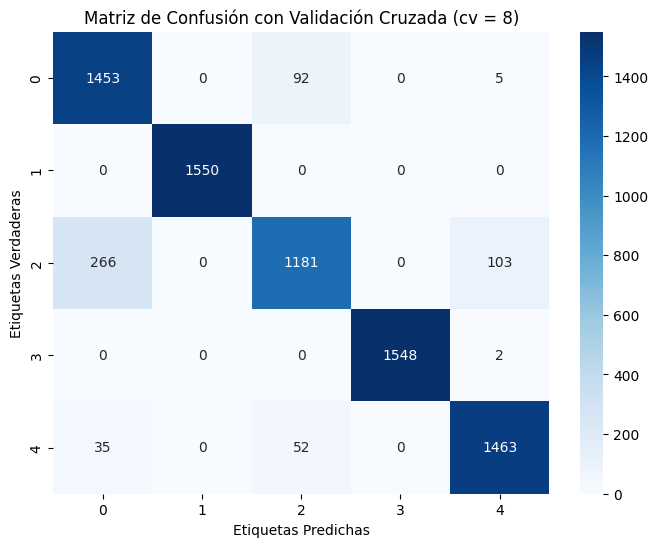

Exactitud media: 0.9283870967741935
Precisión media: 0.9299565862162191
Recall media: 0.9283870967741935
Puntuación F1 media: 0.927475843947062
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_9.png


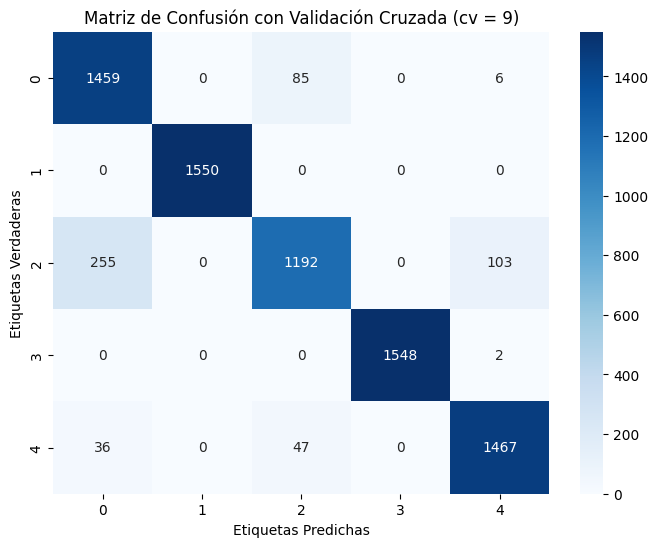

Exactitud media: 0.9310967741935484
Precisión media: 0.9327348390389435
Recall media: 0.9310967741935484
Puntuación F1 media: 0.9302164602386298
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_10.png


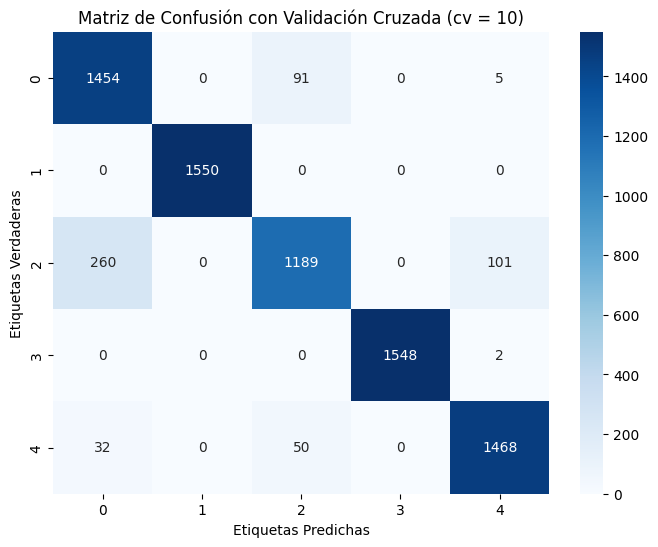

Exactitud media: 0.9301935483870968
Precisión media: 0.9316435278542966
Recall media: 0.9301935483870968
Puntuación F1 media: 0.92930997396529
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_9_vecinos/KNN_llama2_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_simple_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.1.png


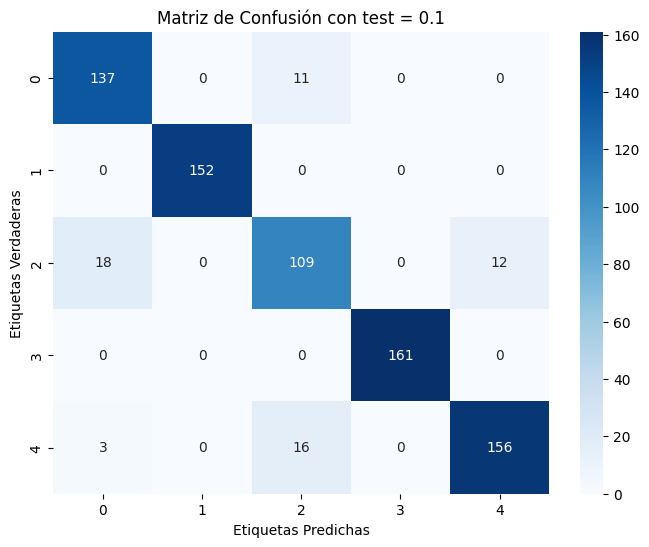

Exactitud del modelo: 0.9225806451612903
Precisión del modelo: 0.9228819686306535
Recall del modelo: 0.9225806451612903
Puntuación F1 del modelo: 0.9224459873489962
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.2.png


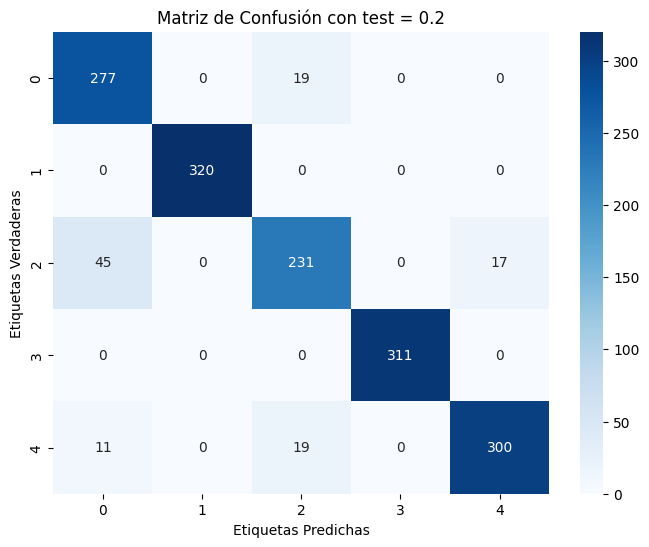

Exactitud del modelo: 0.9283870967741935
Precisión del modelo: 0.929764339849323
Recall del modelo: 0.9283870967741935
Puntuación F1 del modelo: 0.9281280462885089
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.3.png


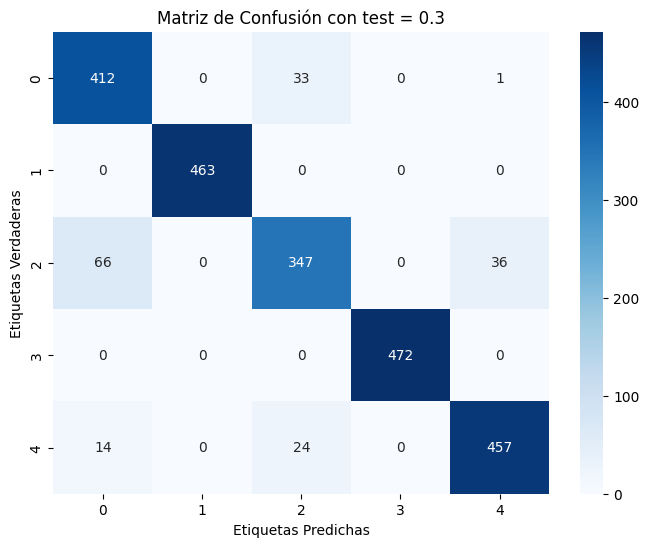

Exactitud del modelo: 0.9251612903225807
Precisión del modelo: 0.9256153832732615
Recall del modelo: 0.9251612903225807
Puntuación F1 del modelo: 0.9245433853670895
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.4.png


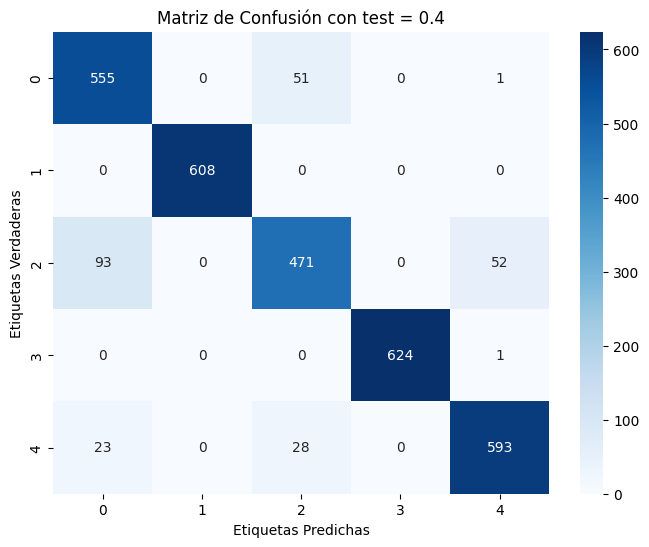

Exactitud del modelo: 0.9196774193548387
Precisión del modelo: 0.9202691838246095
Recall del modelo: 0.9196774193548387
Puntuación F1 del modelo: 0.9190285639545164
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.5.png


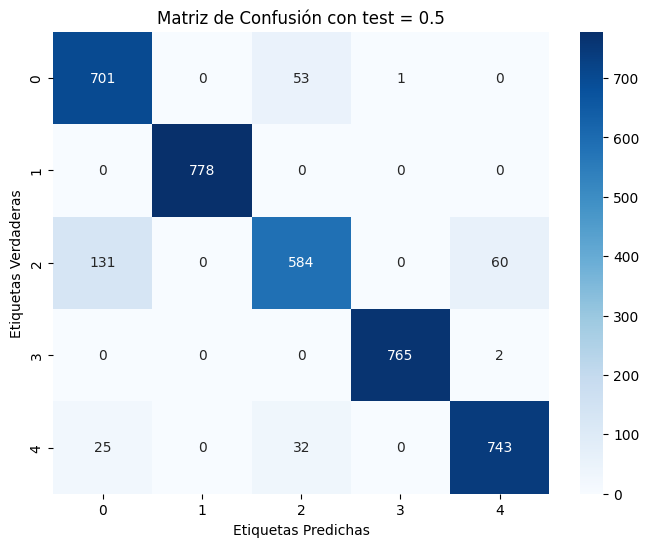

Exactitud del modelo: 0.9215483870967742
Precisión del modelo: 0.9229633599275123
Recall del modelo: 0.9215483870967742
Puntuación F1 del modelo: 0.9206962855410546
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.6.png


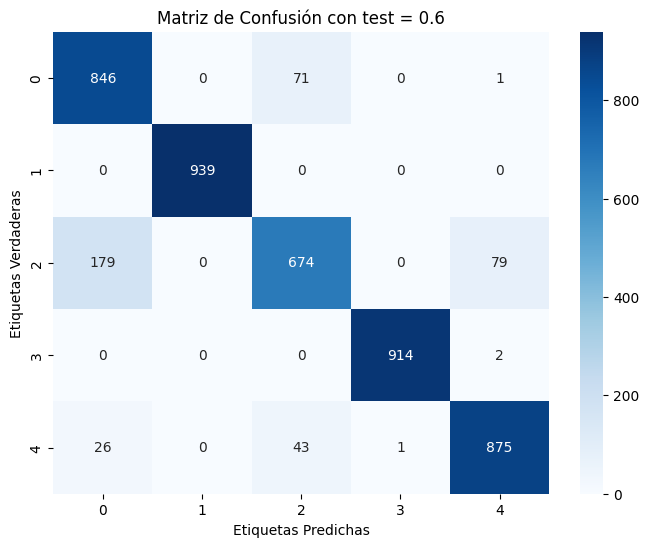

Exactitud del modelo: 0.9135483870967742
Precisión del modelo: 0.9148680845157813
Recall del modelo: 0.9135483870967742
Puntuación F1 del modelo: 0.9123143740851147
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.7.png


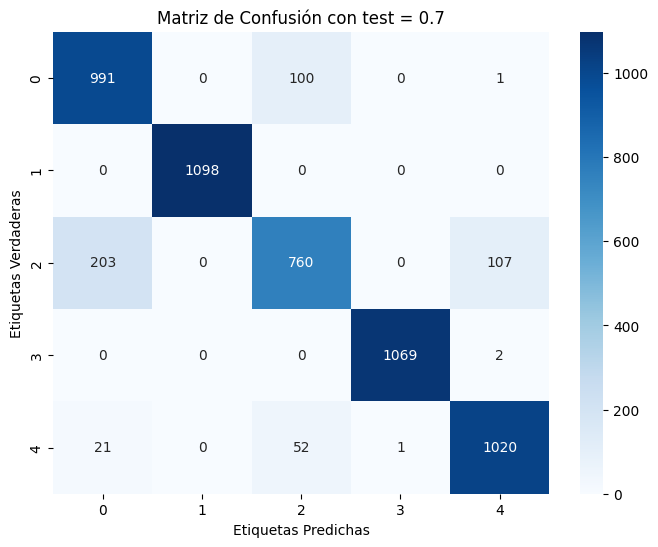

Exactitud del modelo: 0.9102304147465438
Precisión del modelo: 0.9102021566960121
Recall del modelo: 0.9102304147465438
Puntuación F1 del modelo: 0.9087073962372917
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.8.png


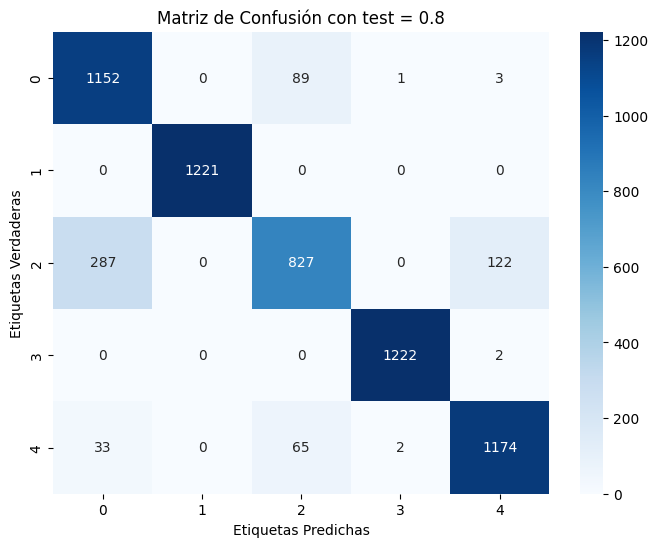

Exactitud del modelo: 0.9025806451612903
Precisión del modelo: 0.9045089288548334
Recall del modelo: 0.9025806451612903
Puntuación F1 del modelo: 0.9003331568538736
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.9.png


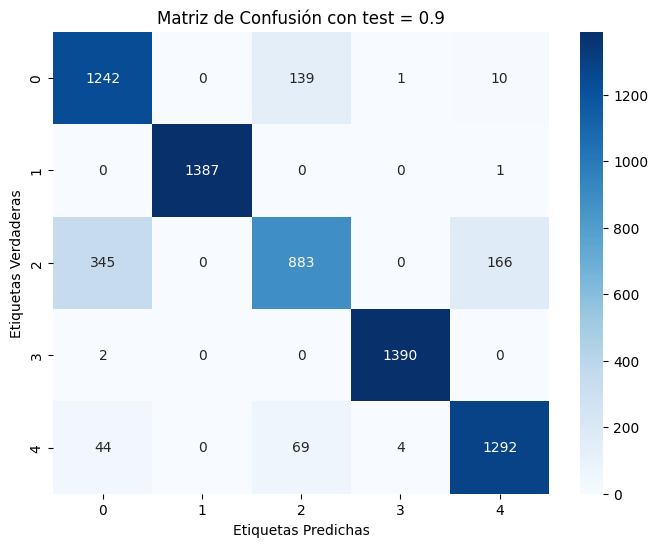

Exactitud del modelo: 0.8880286738351254
Precisión del modelo: 0.8890576630441345
Recall del modelo: 0.8880286738351254
Puntuación F1 del modelo: 0.8852737473261003
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_11_vecinos/KNN_llama2_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_cruz_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_2.png


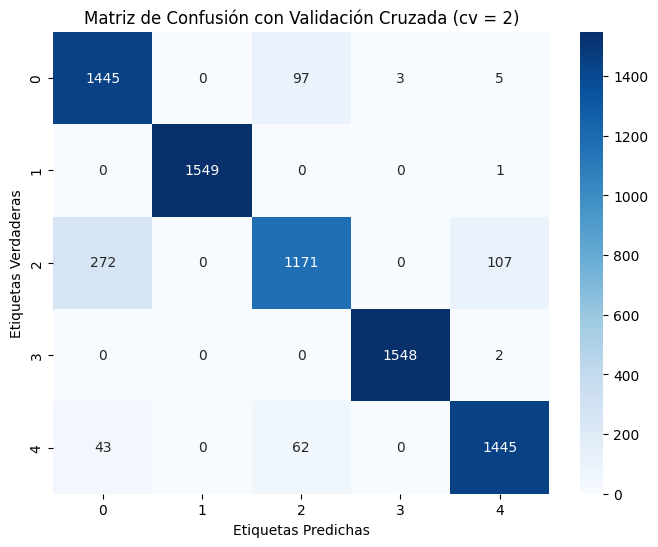

Exactitud media: 0.9236129032258065
Precisión media: 0.9251643340795076
Recall media: 0.9236129032258065
Puntuación F1 media: 0.9227263218486642
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_3.png


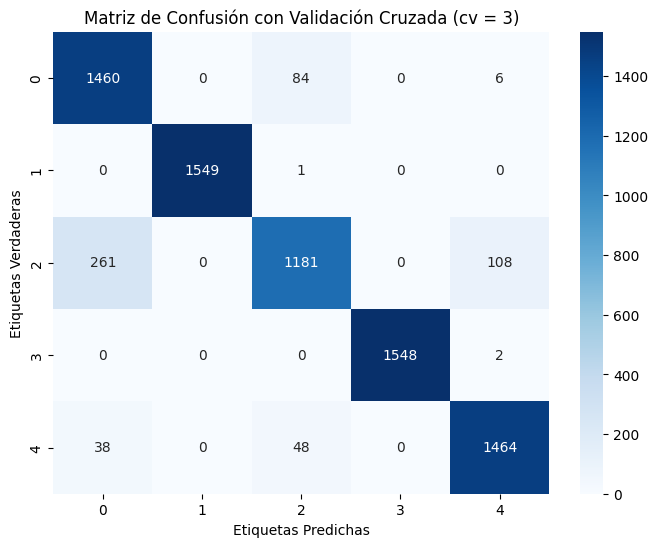

Exactitud media: 0.9292903225806451
Precisión media: 0.9310763355227609
Recall media: 0.9292903225806451
Puntuación F1 media: 0.928331498394548
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_4.png


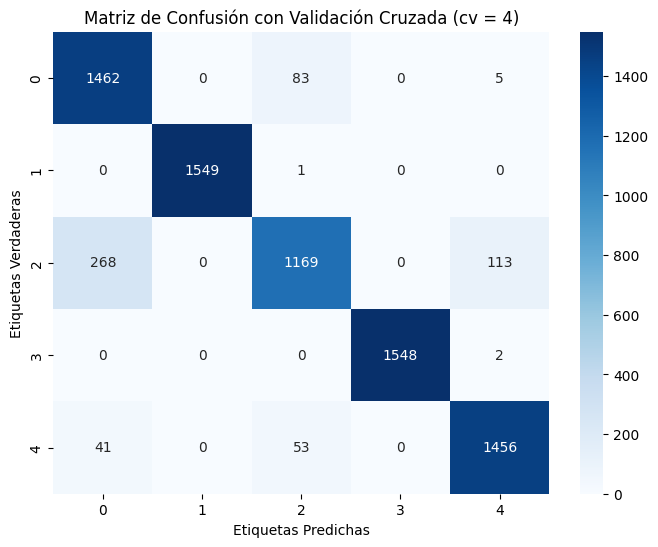

Exactitud media: 0.9269677419354839
Precisión media: 0.9288959424770815
Recall media: 0.9269677419354839
Puntuación F1 media: 0.9259317577013942
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_5.png


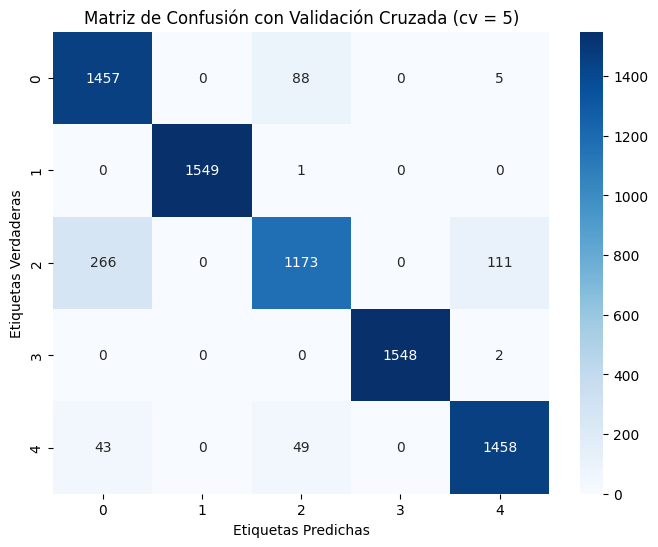

Exactitud media: 0.9270967741935484
Precisión media: 0.9289784116458687
Recall media: 0.9270967741935484
Puntuación F1 media: 0.9261231691918164
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_6.png


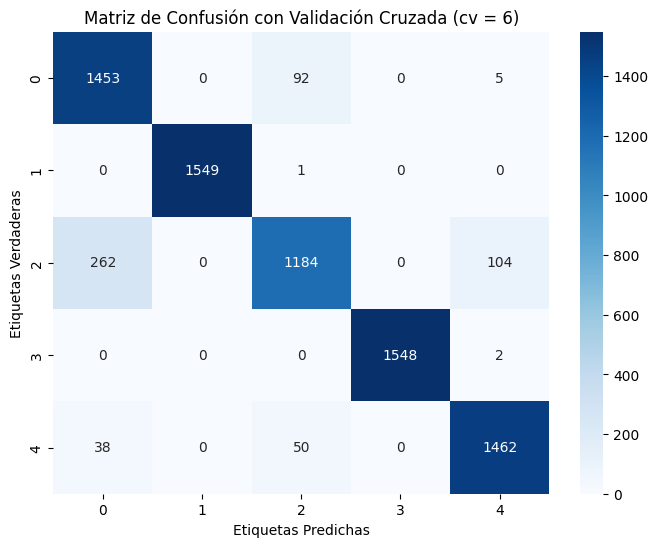

Exactitud media: 0.9285161290322581
Precisión media: 0.9301074272957663
Recall media: 0.9285161290322581
Puntuación F1 media: 0.9276393579455045
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_7.png


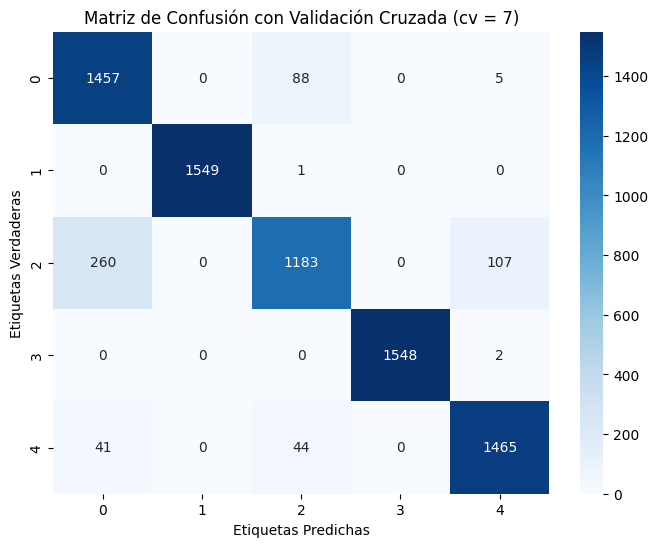

Exactitud media: 0.9292903225806451
Precisión media: 0.9311042568843023
Recall media: 0.9292903225806451
Puntuación F1 media: 0.9283737535203835
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_8.png


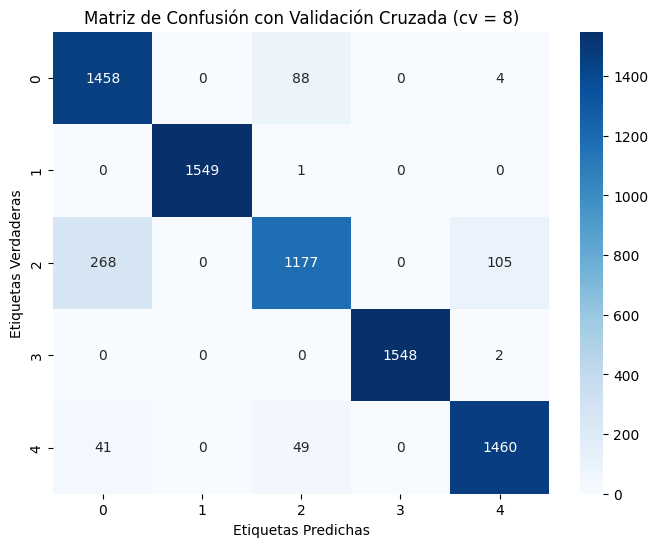

Exactitud media: 0.928
Precisión media: 0.9299057470662352
Recall media: 0.928
Puntuación F1 media: 0.9270754836768486
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_9.png


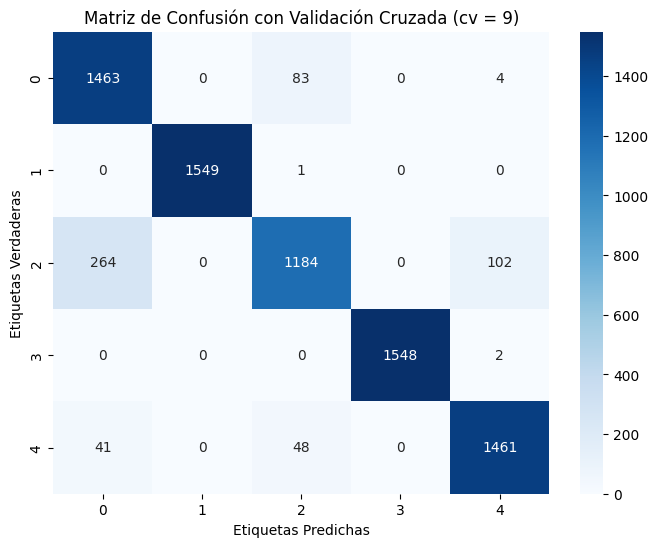

Exactitud media: 0.9296774193548387
Precisión media: 0.9316702168814752
Recall media: 0.9296774193548387
Puntuación F1 media: 0.9287931336142145
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_10.png


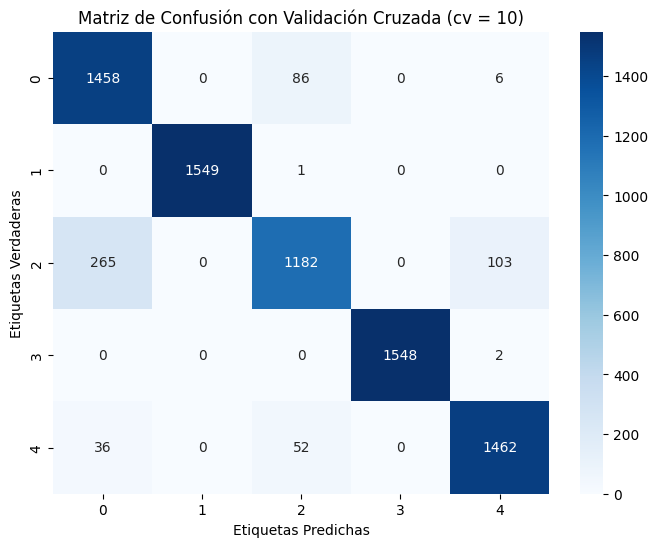

Exactitud media: 0.9289032258064516
Precisión media: 0.9306181863943829
Recall media: 0.9289032258064516
Puntuación F1 media: 0.9279900871312685
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_11_vecinos/KNN_llama2_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_simple_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.1.png


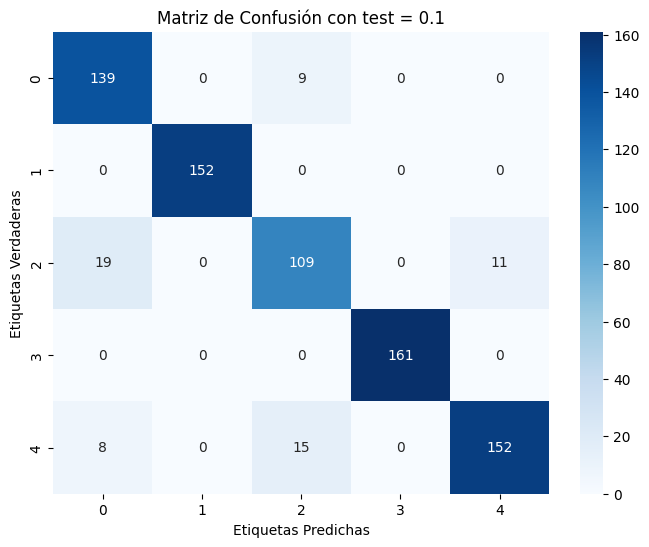

Exactitud del modelo: 0.92
Precisión del modelo: 0.9213357266135949
Recall del modelo: 0.92
Puntuación F1 del modelo: 0.9197841401323946
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.2.png


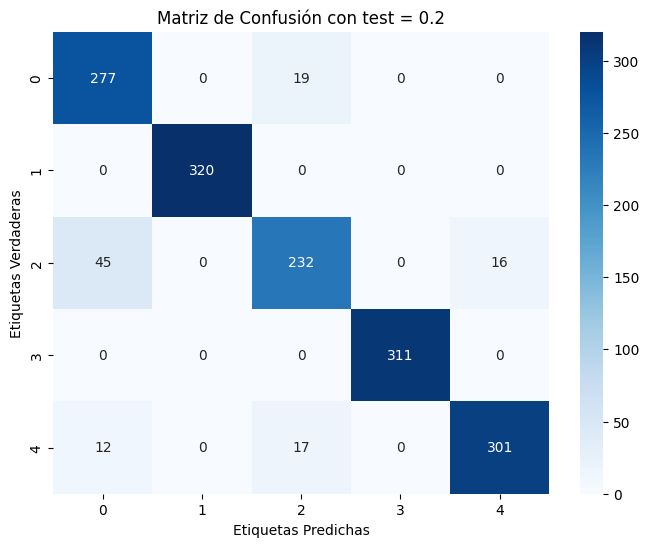

Exactitud del modelo: 0.9296774193548387
Precisión del modelo: 0.9312713997195726
Recall del modelo: 0.9296774193548387
Puntuación F1 del modelo: 0.9294701018488108
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.3.png


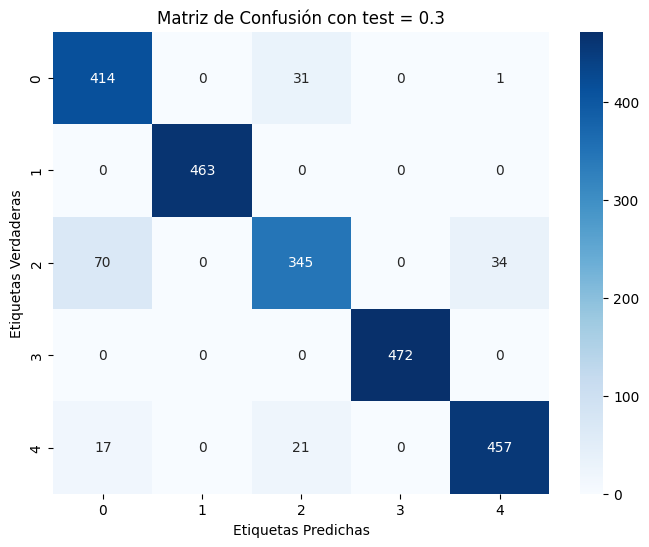

Exactitud del modelo: 0.9251612903225807
Precisión del modelo: 0.9262479141703314
Recall del modelo: 0.9251612903225807
Puntuación F1 del modelo: 0.9245377982489651
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.4.png


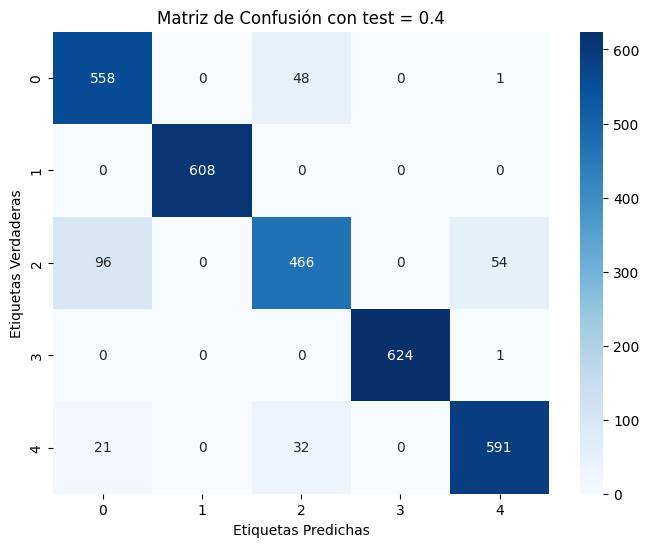

Exactitud del modelo: 0.9183870967741935
Precisión del modelo: 0.9189644891546273
Recall del modelo: 0.9183870967741935
Puntuación F1 del modelo: 0.9176132357893737
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.5.png


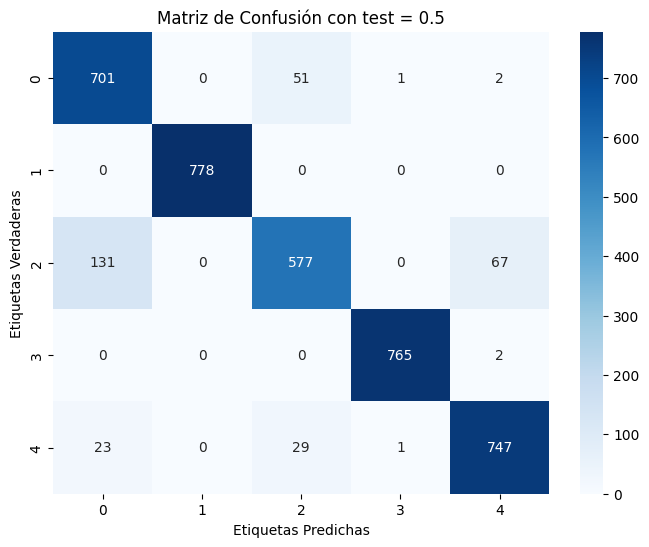

Exactitud del modelo: 0.9207741935483871
Precisión del modelo: 0.9221176005551003
Recall del modelo: 0.9207741935483871
Puntuación F1 del modelo: 0.9196633437767586
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.6.png


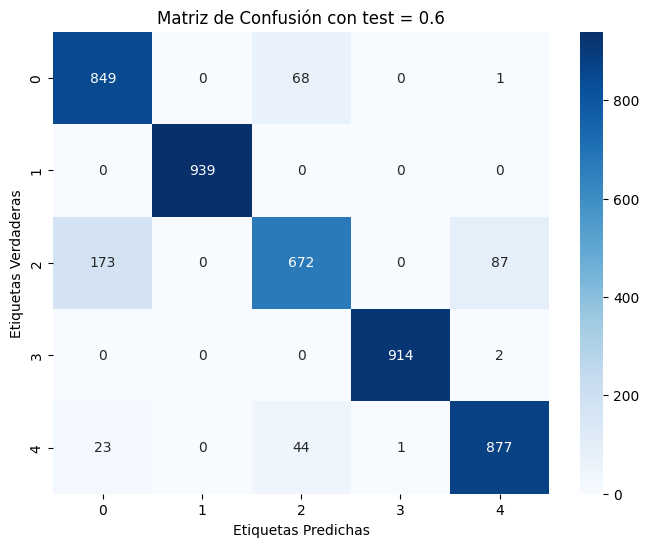

Exactitud del modelo: 0.9141935483870968
Precisión del modelo: 0.9152094011738201
Recall del modelo: 0.9141935483870968
Puntuación F1 del modelo: 0.9127824853348908
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.7.png


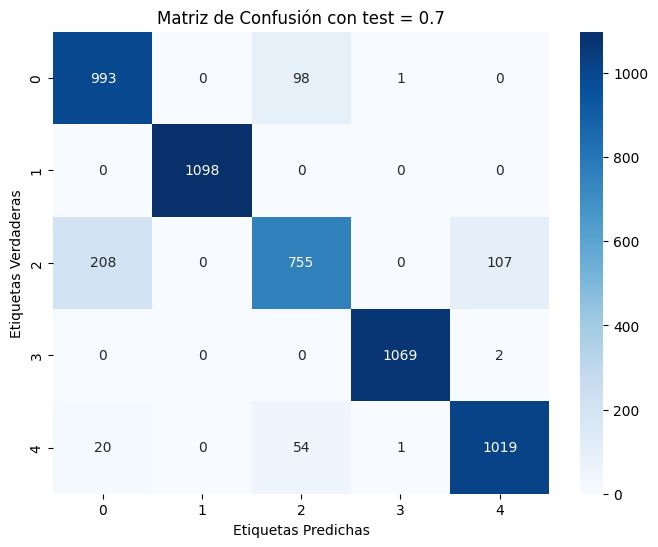

Exactitud del modelo: 0.9094930875576037
Precisión del modelo: 0.9095036839257985
Recall del modelo: 0.9094930875576037
Puntuación F1 del modelo: 0.9078847509515158
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.8.png


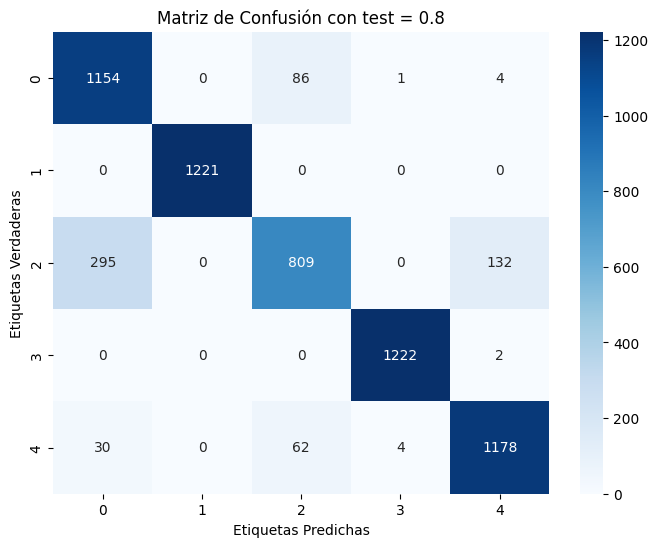

Exactitud del modelo: 0.9006451612903226
Precisión del modelo: 0.9026917779243503
Recall del modelo: 0.9006451612903226
Puntuación F1 del modelo: 0.8979343250460606
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.9.png


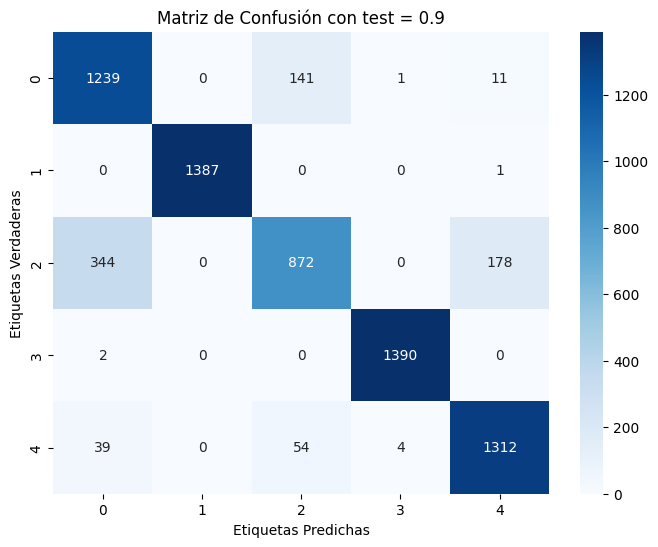

Exactitud del modelo: 0.8888888888888888
Precisión del modelo: 0.889894488136509
Recall del modelo: 0.8888888888888888
Puntuación F1 del modelo: 0.8856839422990604
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_simple_13_vecinos/KNN_llama2_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Se creó la carpeta KNN_llama2_embeddings_val_cruz_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_2.png


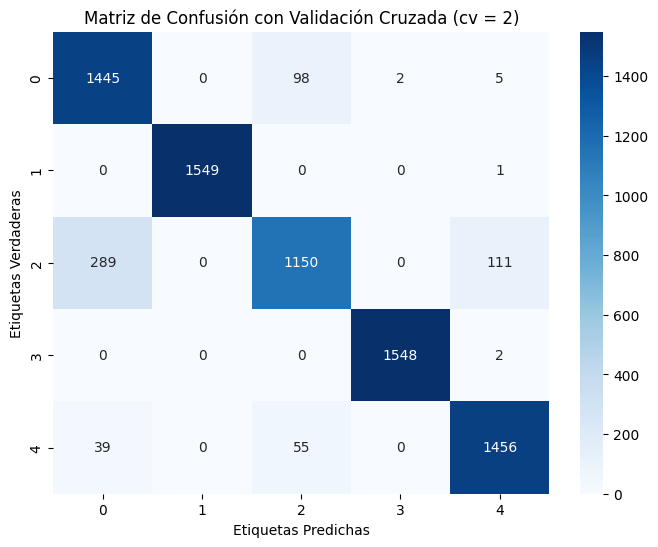

Exactitud media: 0.9223225806451613
Precisión media: 0.9241471213125737
Recall media: 0.9223225806451613
Puntuación F1 media: 0.9212183990863331
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_3.png


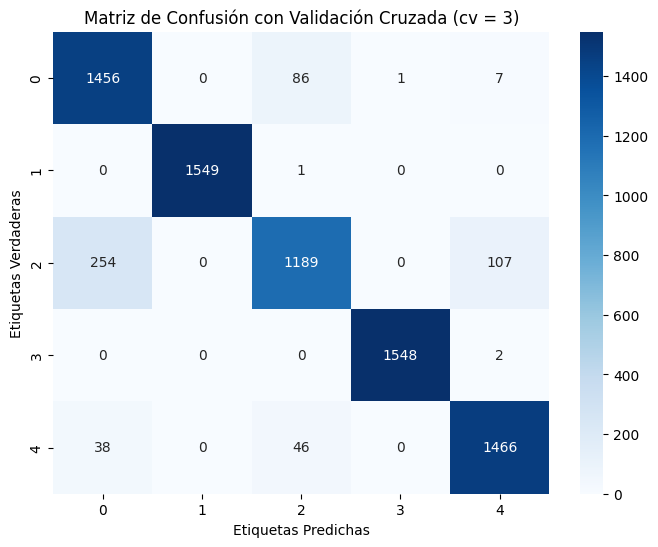

Exactitud media: 0.9300645161290323
Precisión media: 0.9316752636766042
Recall media: 0.9300645161290323
Puntuación F1 media: 0.9291612197854727
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_4.png


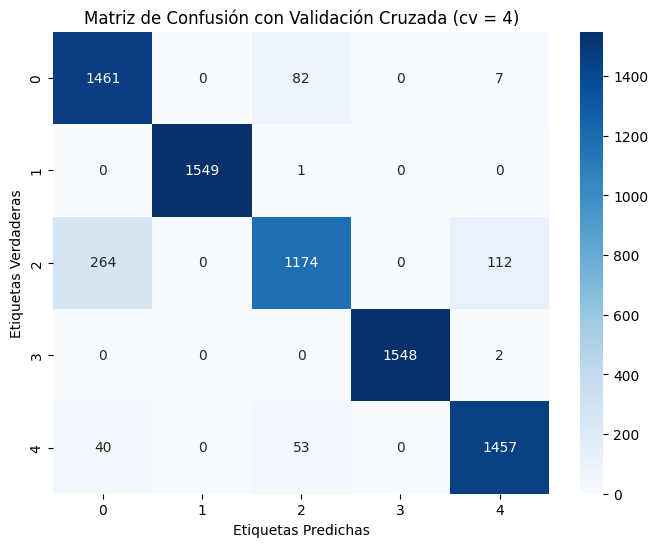

Exactitud media: 0.9276129032258065
Precisión media: 0.9294531809658062
Recall media: 0.9276129032258065
Puntuación F1 media: 0.9266088800000302
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_5.png


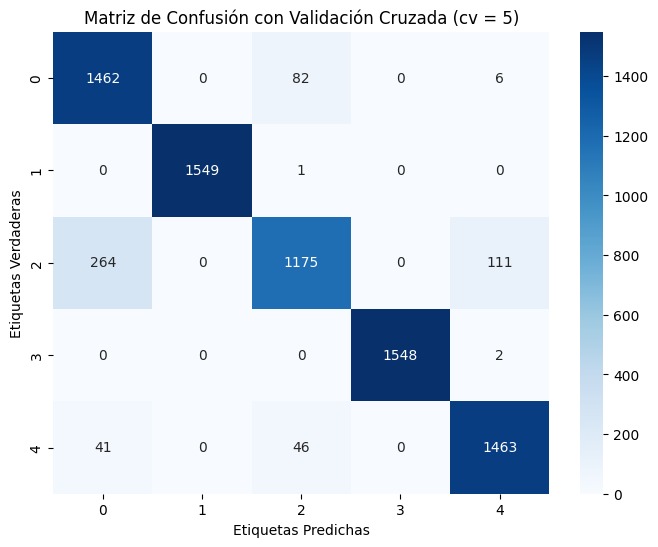

Exactitud media: 0.9286451612903226
Precisión media: 0.9306486877969474
Recall media: 0.9286451612903226
Puntuación F1 media: 0.9276368519705507
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_6.png


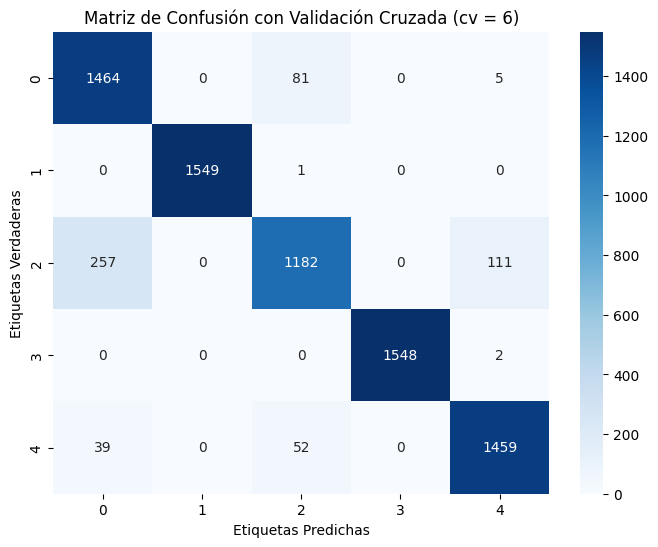

Exactitud media: 0.9292903225806451
Precisión media: 0.9310337710697943
Recall media: 0.9292903225806451
Puntuación F1 media: 0.9283259290101091
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_7.png


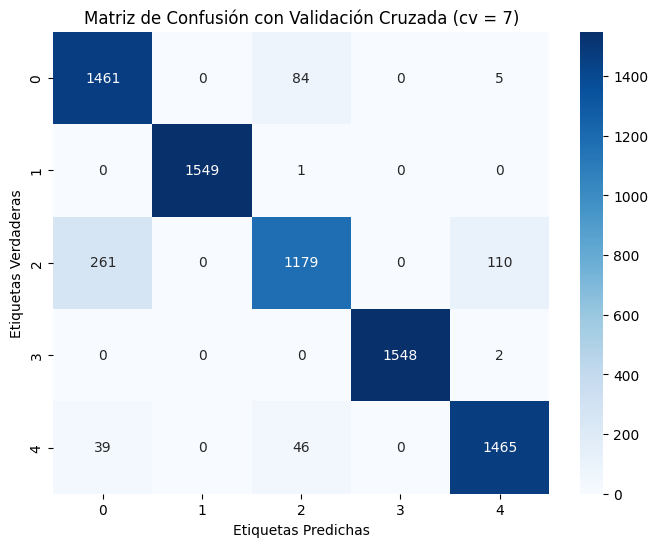

Exactitud media: 0.9292903225806451
Precisión media: 0.9311370464574849
Recall media: 0.9292903225806451
Puntuación F1 media: 0.9283049135869651
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_8.png


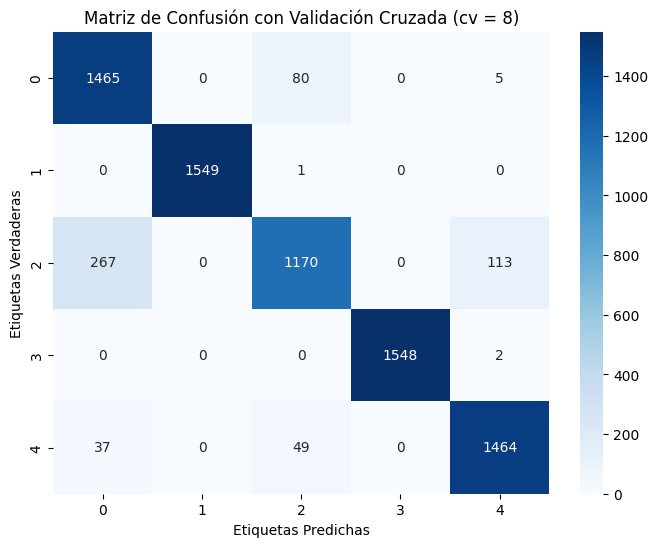

Exactitud media: 0.9285161290322581
Precisión media: 0.9304787844527811
Recall media: 0.9285161290322581
Puntuación F1 media: 0.9274299392703187
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_9.png


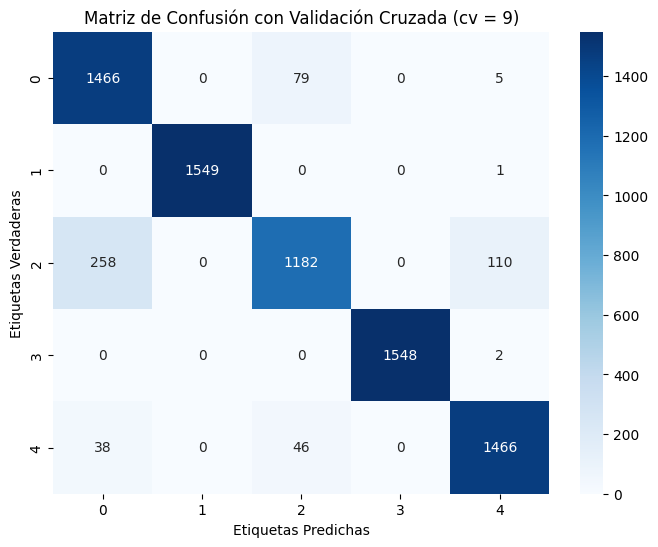

Exactitud media: 0.9304516129032258
Precisión media: 0.9323750526918964
Recall media: 0.9304516129032258
Puntuación F1 media: 0.9294568877224442
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
La carpeta KNN_llama2_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_llama27b
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_10.png


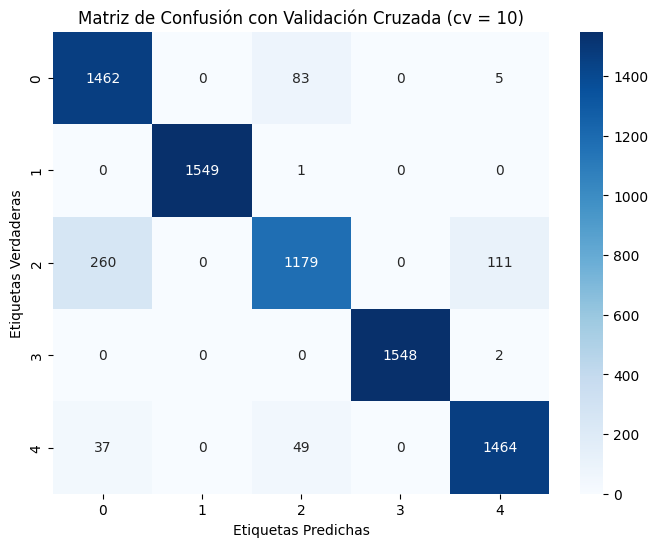

Exactitud media: 0.9292903225806451
Precisión media: 0.9310385971807132
Recall media: 0.9292903225806451
Puntuación F1 media: 0.9282895317332626
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_llama27b/KNN_llama2_embeddings_val_cruz_13_vecinos/KNN_llama2_embeddings_val_cruz.json


In [4]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/KNN_llama2_embeddings_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/KNN_llama2_embeddings_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}


lista = [3,5,7,9,11,13]

for numero in lista: 
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = knn_classification(datos,numero,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = knn_classification(datos,numero,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)